# Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'

In [ ]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

augmented-alzheimer-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

zip_ref = zipfile.ZipFile('augmented-alzheimer-mri-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:

import os

extracted_files = os.listdir('/tmp')
print(extracted_files)


['__autograph_generated_fileg5hblua9.py', 'drive.a736cfbd068a.root.log.INFO.20230701-171424.2519', 'OriginalDataset', 'dap_multiplexer.a736cfbd068a.root.log.INFO.20230701-170506.121', 'pyright-2357-cmfbU6Qn9766', 'initgoogle_syslog_dir.0', 'drive.INFO', '__autograph_generated_filebaamhuas.py', 'drive.a736cfbd068a.root.log.WARNING.20230701-171424.2609', 'pyright-2357-bjZqf76UfsST', 'drive.a736cfbd068a.root.log.ERROR.20230701-171424.2609', 'drivefs_ipc.0_shell', 'language_service.INFO', '__pycache__', 'drive.a736cfbd068a.root.log.INFO.20230701-171424.2609', 'python-languageserver-cancellation', '__autograph_generated_file8904lz9b.py', 'drive.a736cfbd068a.root.log.INFO.20230701-171419.2519', 'dap_multiplexer.INFO', 'directoryprefetcher_binary.INFO', 'debugger_2b4tk6ke8n', 'language_service.a736cfbd068a.root.log.INFO.20230701-171349.2348', 'drive.WARNING', 'drivefs_ipc.0', 'directoryprefetcher_binary.a736cfbd068a.root.log.INFO.20230701-171425.2691', 'drive.ERROR', 'drive.a736cfbd068a.root.

In [ ]:
len(os.listdir('/tmp/AugmentedAlzheimerDataset'))



4

In [ ]:
len(os.listdir('/tmp/OriginalDataset'))

4

In [ ]:
import os

file_list = os.listdir()
print(file_list)

['.config', 'cnn.pdf', 'augmented-alzheimer-mri-dataset.zip', 'Augmented.pdf', 'kaggle.json', 'Original.pdf', 'drive', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# System libraries
from pathlib import Path
import os.path
from distutils.dir_util import copy_tree, remove_tree
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
import time

from PIL import Image
from random import randint

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow

from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101 # ResNet 101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3


import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))






Num GPUs Available:  1


In [ ]:
# Set the seed value for experiment reproducibility.
seed_value = 1842
tensorflow.random.set_seed(seed_value)  # Set seed for TensorFlow random operations
np.random.seed(seed_value)  # Set seed for NumPy random operations

# Turn off warnings for a cleaner-looking notebook
warnings.simplefilter('ignore')


Data Pre-processing

In [ ]:
#AUGMENTED DATA

aug_data = os.listdir('/tmp/AugmentedAlzheimerDataset')
org_data = os.listdir('/tmp/OriginalDataset')

In [ ]:
import os
from pathlib import Path
import pandas as pd

# Define the paths for augmented and original datasets
aug_data_path = '/tmp/AugmentedAlzheimerDataset'
org_data_path = '/tmp/OriginalDataset'

# Get filepaths and labels
filepaths = []
labels = []

# Iterate through the directories and files in the augmented dataset path
for root, dirs, files in os.walk(aug_data_path):
    for file in files:
        # Check if the file has a .jpg or .jpeg extension
        if file.lower().endswith(('.jpg', '.jpeg')):
            filepaths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create pandas Series for filepaths and labels
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels into a dataframe
image_df = pd.concat([filepaths, labels], axis=1)




In [ ]:
image_df

Filepath             Label
0      /tmp/AugmentedAlzheimerDataset/NonDemented/685...       NonDemented
1      /tmp/AugmentedAlzheimerDataset/NonDemented/768...       NonDemented
2      /tmp/AugmentedAlzheimerDataset/NonDemented/c4a...       NonDemented
3      /tmp/AugmentedAlzheimerDataset/NonDemented/24d...       NonDemented
4      /tmp/AugmentedAlzheimerDataset/NonDemented/e7d...       NonDemented
...                                                  ...               ...
33979  /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
33980  /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
33981  /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
33982  /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
33983  /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented

[33984 rows x 2 columns]

In [ ]:
def get_dataset(augmented=0):
    if augmented == 0:
        image_dir = Path(org_data_path)
    else:
        image_dir = Path(aug_data_path)

    # Get filepaths and labels
    filepaths = []
    labels = []

    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg')):
                filepaths.append(os.path.join(root, file))
                labels.append(os.path.basename(root))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df


In [ ]:
train_df = get_dataset(1)
test_df = get_dataset(0)

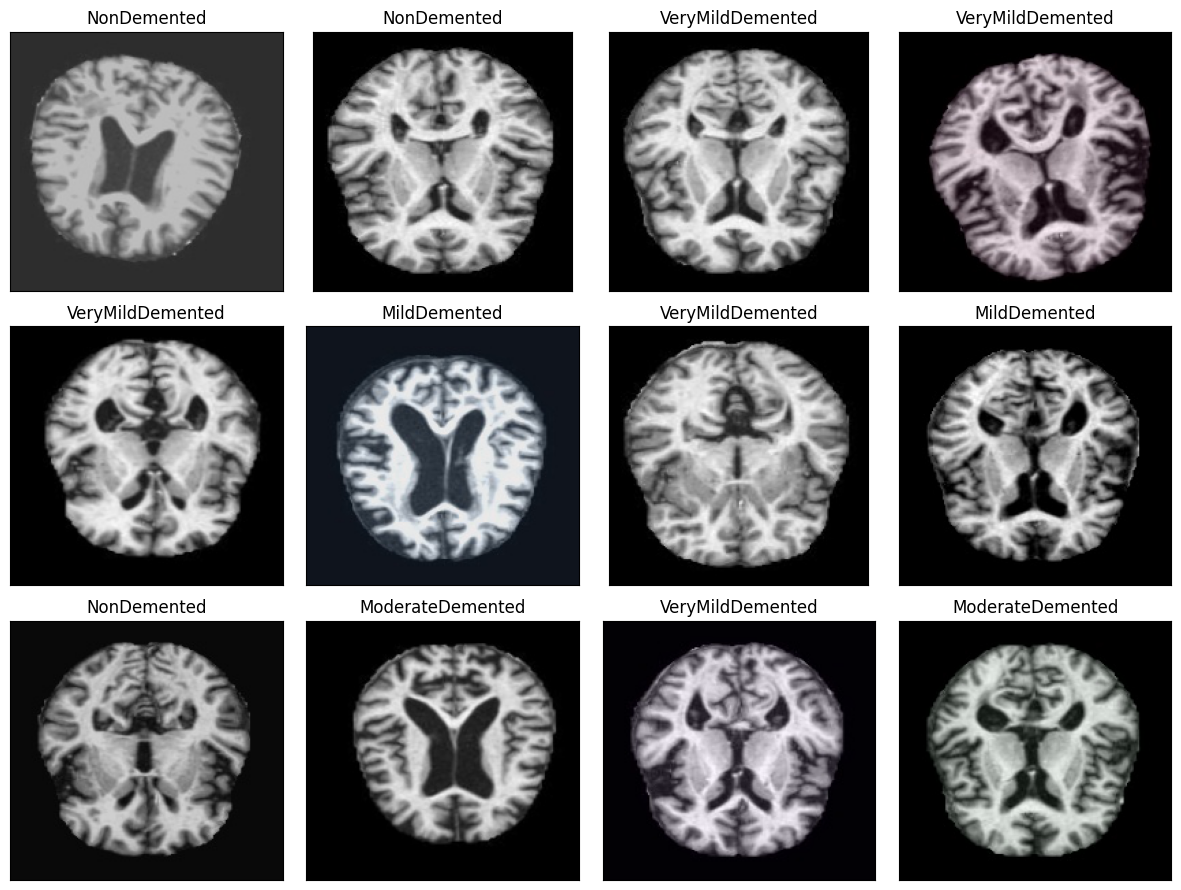

In [ ]:
random_index = np.random.randint(0, len(train_df), size=(3, 4))

# Create a figure with 3 rows and 4 columns for image display
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9),
                         subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the axes and display the images with labels
for i, ax in enumerate(axes.flat):
    # Calculate the row and column indices
    row = i // 4
    col = i % 4

    # Check if the calculated indices are within the bounds of the random_index array
    if row < random_index.shape[0] and col < random_index.shape[1]:
        # Read the image using OpenCV and convert the color space to RGB
        img = cv2.cvtColor(plt.imread(train_df.Filepath[random_index[row, col]]), cv2.COLOR_BGR2RGB)

        # Display the image
        ax.imshow(img)

        # Set the title as the corresponding label
        ax.set_title(train_df.Label[random_index[row, col]])

# Adjust the layout and save the figure as a PDF
plt.tight_layout()
plt.savefig("Augmented.pdf")

# Show the figure with the images and labels
plt.show()


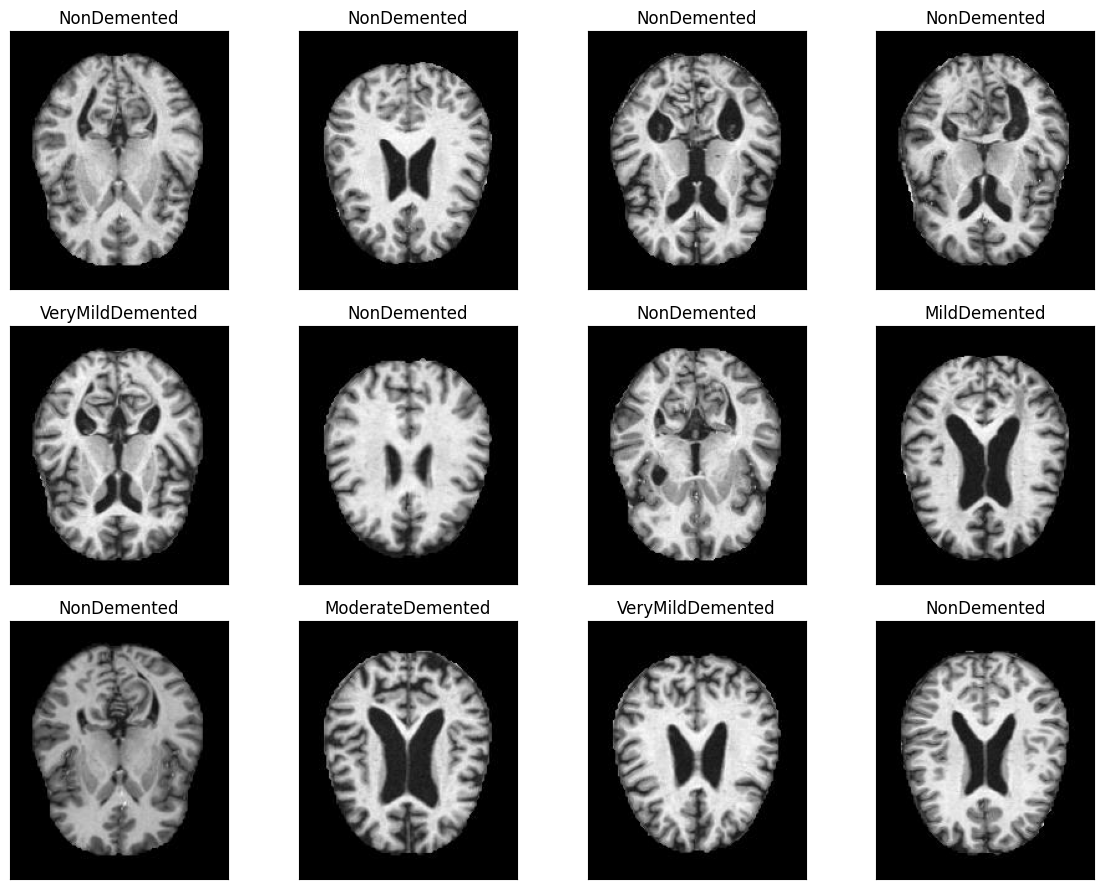

In [ ]:
random_index = np.random.randint(0, len(test_df), size=(3, 4))

# Create a figure with 3 rows and 4 columns for image display
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9),
                         subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the axes and display the images with labels
for i, ax in enumerate(axes.flat):
    # Calculate the row and column indices
    row = i // 4
    col = i % 4

    # Check if the calculated indices are within the bounds of the random_index array
    if row < random_index.shape[0] and col < random_index.shape[1]:
        # Read the image using OpenCV and convert the color space to RGB
        img = cv2.cvtColor(plt.imread(test_df.Filepath[random_index[row, col]]), cv2.COLOR_BGR2RGB)

        # Display the image
        ax.imshow(img)

        # Set the title as the corresponding label
        ax.set_title(test_df.Label[random_index[row, col]])

# Adjust the layout and save the figure as a PDF
plt.tight_layout()
plt.savefig("Original.pdf")

# Show the figure with the images and labels
plt.show()


In [ ]:
print("Train data set label distribution:\n",train_df.Label.value_counts())

print("\nTest data set label distribution:\n", test_df.Label.value_counts())

Train data set label distribution:
 NonDemented         9600
MildDemented        8960
VeryMildDemented    8960
ModerateDemented    6464
Name: Label, dtype: int64

Test data set label distribution:
 NonDemented         3200
VeryMildDemented    2240
MildDemented         896
ModerateDemented      64
Name: Label, dtype: int64


In [ ]:
import shutil
import os

# Set the base directory path
base_dir = "/tmp/"

# Define the directory paths for the train and test datasets

train_dir = os.path.join(base_dir, "AugmentedAlzheimerDataset/")
test_dir = os.path.join(base_dir, "OriginalDataset/")



In [ ]:
# Define the class labels
class_labels = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Define the desired image size and dimension

IMG_SIZE = 100
IMAGE_SIZE = [100, 100]
DIM = (IMG_SIZE, IMG_SIZE)


In [ ]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Generate training data from the augmented Alzheimer's dataset
train_gen = datagen.flow_from_directory(directory=train_dir,
                                             target_size=DIM,
                                             batch_size=400,
                                             class_mode='categorical',
                                             subset='training',
                                             shuffle=True)

# Generate validation data from the augmented Alzheimer's dataset
validation_gen = datagen.flow_from_directory(directory=train_dir,
                                             target_size=DIM,
                                             batch_size=400,
                                             class_mode='categorical',
                                             subset='validation',
                                             shuffle=True)

# Generate test data from the original dataset
test_gen = datagen.flow_from_directory(directory=test_dir,
                                             target_size=DIM,
                                             batch_size=6400,
                                             class_mode='categorical')


Found 30586 images belonging to 4 classes.
Found 3398 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [ ]:
# Generate test data for plotting from the original dataset
test_gen_plot = datagen.flow_from_directory(directory=test_dir,
                                             target_size=DIM,
                                             batch_size=128,
                                             class_mode='categorical')


Found 6400 images belonging to 4 classes.


In [ ]:
import itertools

def visualize_training_metrics(training_history, model, test_generator, y_actual, y_pred, classes, model_name):
    """
    Input: trained model history, model, test image generator, actual and predicted labels, class list
    Output: Plots loss vs epochs, accuracy vs epochs, confusion matrix
    """

    # Evaluate the results:
    test_metrics = model.evaluate(test_generator, verbose=False)
    test_loss = test_metrics[0]
    test_acc = test_metrics[1] * 100
    results_title = f"\nModel Accuracy: {test_acc:.2f}% on Test Data\n"
    print(results_title)

    # Print classification report
    print(classification_report(y_actual, y_pred, target_names=classes))

    # Extract data from training history for plotting
    history_dict = training_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    # Get the min loss and max accuracy for plotting
    min_loss = np.min(val_loss_values)
    max_acc = np.max(val_acc_values)

    # Create plots
    plt.subplots(figsize=(12, 4))

    # Plot loss by epochs
    plt.subplot(1, 3, 1)
    plt.plot(epochs, loss_values, 'b-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'cornflowerblue', label='Validation loss')
    plt.title('Validation Loss by Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.axhline(y=min_loss, color='darkslategray', linestyle='--')
    plt.legend()

    # Plot accuracy by epochs
    plt.subplot(1, 3, 2)
    plt.plot(epochs, acc_values, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'cornflowerblue', label='Validation Accuracy')
    plt.plot(epochs, [test_acc / 100] * len(epochs), 'darkmagenta', linestyle='--', label='Test Accuracy')
    plt.title('Validation Accuracy by Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.axhline(y=max_acc, color='darkslategray', linestyle='--')
    plt.legend()

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_actual, y_pred)

    # Create confusion matrix plot
    plt.subplot(1, 3, 3)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)  # Change the cmap to Reds
    plt.title(f"Confusion Matrix \nAccuracy: {test_acc:.2f}%")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop through matrix, plot each value
    threshold = cm.max() / 2.
    for r, c in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(c, r, format(cm[r, c], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[r, c] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(f"{model_name}.pdf")

    plt.show()


In [ ]:
# Prepare true and predicted labels for evaluation on the test data.

def prepare_for_test(model, test_gen):
    data, y_true = test_gen.next()
    y_pred_ = model.predict(data, batch_size = 64)
    y_pred = []
    for i in range(y_pred_.shape[0]):
        y_pred.append(np.argmax(y_pred_[i]))

    y_true = np.argmax(y_true, axis=1)

    return y_true, y_pred


# Baseline Model - CNN Architecture

Model Architecture

In [ ]:

# Create a Sequential model
model_cnn = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation
# Specify the input shape as (image_size, image_size, 3)
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Add a MaxPooling2D layer with a 2x2 pool size
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters and a 3x3 kernel
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output tensor from the previous layer
model_cnn.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model_cnn.add(Dense(128, activation='relu'))

# Add a final Dense layer with 4 units (one for each class) and softmax activation
model_cnn.add(Dense(4, activation='softmax'))

# Print the model summary
model_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

Model Compilation

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

# set optimizer to SGD with a higher learning rate
opt = SGD(learning_rate=0.01)

#set loss function to binary cross-entropy
loss = BinaryCrossentropy()

# Compile the model with the modified optimizer and loss
model_cnn.compile(optimizer=opt, loss=loss, metrics=['accuracy'])


Model Training

In [ ]:
import time

# Start the timer
tic = time.perf_counter()
history = model_cnn.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=20)
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))


Epoch 1/20
77/77 [==============================] - 50s 500ms/step - loss: 0.5670 - accuracy: 0.2938 - val_loss: 0.5560 - val_accuracy: 0.3052
Epoch 2/20
77/77 [==============================] - 38s 493ms/step - loss: 0.5538 - accuracy: 0.3281 - val_loss: 0.5512 - val_accuracy: 0.3137
Epoch 3/20
77/77 [==============================] - 38s 495ms/step - loss: 0.5490 - accuracy: 0.3446 - val_loss: 0.5461 - val_accuracy: 0.3620
Epoch 4/20
77/77 [==============================] - 38s 492ms/step - loss: 0.5438 - accuracy: 0.3589 - val_loss: 0.5405 - val_accuracy: 0.3682
Epoch 5/20
77/77 [==============================] - 38s 493ms/step - loss: 0.5381 - accuracy: 0.3719 - val_loss: 0.5342 - val_accuracy: 0.3923
Epoch 6/20
77/77 [==============================] - 38s 493ms/step - loss: 0.5320 - accuracy: 0.3891 - val_loss: 0.5274 - val_accuracy: 0.3941
Epoch 7/20
77/77 [==============================] - 38s 493ms/step - loss: 0.5253 - accuracy: 0.4166 - val_loss: 0.5202 - val_accuracy: 0.4276

Model Evaluation

100/100 [==============================] - 1s 3ms/step

Model Accuracy: 52.47% on Test Data

              precision    recall  f1-score   support

        mild       0.37      0.47      0.41       896
    moderate       1.00      0.08      0.14        64
      normal       0.56      0.90      0.69      3200
   very-mild       0.58      0.02      0.04      2240

    accuracy                           0.52      6400
   macro avg       0.63      0.37      0.32      6400
weighted avg       0.54      0.52      0.42      6400



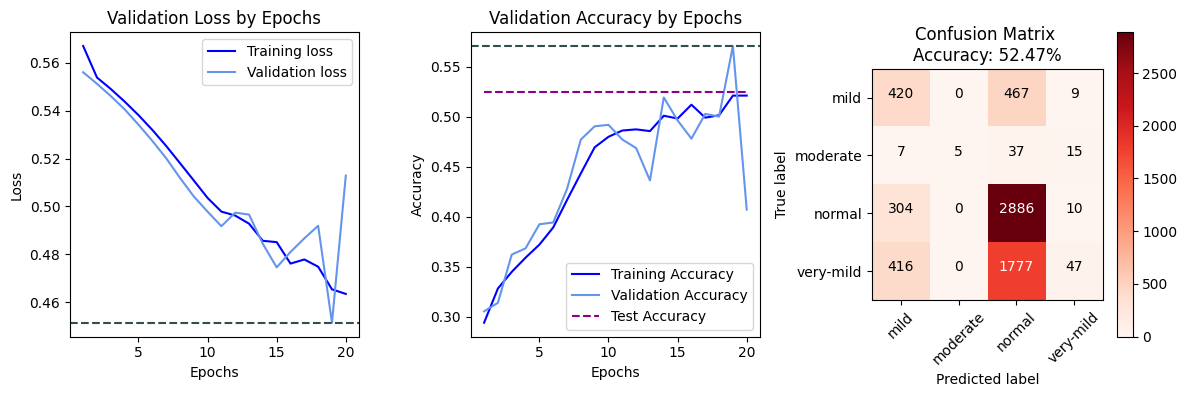

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model_cnn, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model_cnn, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="cnn")

# Hyperparameter Optimisation of baseline model  *

Model Architecture

In [ ]:

# Create a Sequential model
model_cnn = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation
# Specify the input shape as (image_size, image_size, 3)
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Add a MaxPooling2D layer with a 2x2 pool size
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters and a 3x3 kernel
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output tensor from the previous layer
model_cnn.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model_cnn.add(Dense(128, activation='relu'))

# Add a final Dense layer with 4 units (one for each class) and softmax activation
model_cnn.add(Dense(4, activation='softmax'))

# Print the model summary
model_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

Model Compilation

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

# Define the optimizer with a learning rate of 0.001, beta_1 = 0.9, and beta_2 = 0.999
#opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model, specifying the optimizer, loss function, and metrics
model_cnn.compile(optimizer= 'Adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

# Define an EarlyStopping callback to stop training if validation loss doesn't improve for 5 epochs
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpointer = ModelCheckpoint(filepath = '.alzheimer_cnn_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')


Model Training

In [ ]:
import time

# Start the timer
tic = time.perf_counter()
history = model_cnn.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))


Epoch 1/50
77/77 [==============================] - 49s 497ms/step - loss: 1.2810 - accuracy: 0.4203 - val_loss: 0.9507 - val_accuracy: 0.5762
Epoch 2/50
77/77 [==============================] - 38s 490ms/step - loss: 0.8289 - accuracy: 0.6412 - val_loss: 0.7275 - val_accuracy: 0.6875
Epoch 3/50
77/77 [==============================] - 38s 489ms/step - loss: 0.6462 - accuracy: 0.7295 - val_loss: 0.5694 - val_accuracy: 0.7669
Epoch 4/50
77/77 [==============================] - 38s 488ms/step - loss: 0.5106 - accuracy: 0.7912 - val_loss: 0.4904 - val_accuracy: 0.7975
Epoch 5/50
77/77 [==============================] - 38s 489ms/step - loss: 0.4165 - accuracy: 0.8332 - val_loss: 0.4313 - val_accuracy: 0.8317
Epoch 6/50
77/77 [==============================] - 38s 489ms/step - loss: 0.3394 - accuracy: 0.8693 - val_loss: 0.3789 - val_accuracy: 0.8587
Epoch 7/50
77/77 [==============================] - 38s 489ms/step - loss: 0.2841 - accuracy: 0.8930 - val_loss: 0.3666 - val_accuracy: 0.8549

Model Evaluation

100/100 [==============================] - 1s 3ms/step

Model Accuracy: 96.61% on Test Data

              precision    recall  f1-score   support

        mild       0.91      1.00      0.95       896
    moderate       1.00      1.00      1.00        64
      normal       0.97      0.98      0.98      3200
   very-mild       0.98      0.93      0.96      2240

    accuracy                           0.97      6400
   macro avg       0.97      0.98      0.97      6400
weighted avg       0.97      0.97      0.97      6400



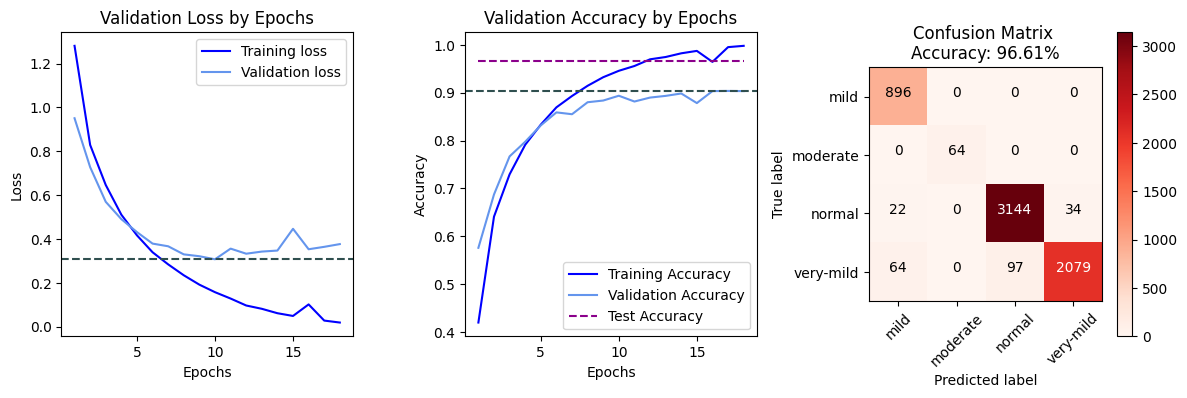

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model_cnn, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model_cnn, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="cnn")

### Hyperparameter tuning of Baseline CNN Model 1 - 3 convo layers IMG SIZE 176, LR, ADAM AND 30 EPOCHS, patience 8

In [ ]:
# Define the class labels
class_labels = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Define the desired image size and dimension

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)


Model architecture

In [ ]:

# Create a Sequential model
model_cnn = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation
# Specify the input shape as (image_size, image_size, 3)
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Add a MaxPooling2D layer with a 2x2 pool size
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters and a 3x3 kernel
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 128 filters and a 3x3 kernel
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output tensor from the previous layer
model_cnn.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model_cnn.add(Dense(128, activation='relu'))

# Add a final Dense layer with 4 units (one for each class) and softmax activation
model_cnn.add(Dense(4, activation='softmax'))

# Print the model summary
model_cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 174, 174, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 87, 87, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 128)     

Model Compilation

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

# Define the optimizer with a learning rate of 0.001, beta_1 = 0.9, and beta_2 = 0.999
#opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model, specifying the optimizer, loss function, and metrics
model_cnn.compile(optimizer= 'Adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

# Define an EarlyStopping callback to stop training if validation loss doesn't improve for 5 epochs
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpointer = ModelCheckpoint(filepath = '.alzheimer_cnn_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')



Model Training

In [ ]:
import time

# Start the timer
tic = time.perf_counter()
history = model_cnn.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=10, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))


Epoch 1/10
77/77 [==============================] - 56s 676ms/step - loss: 1.1858 - accuracy: 0.4645 - val_loss: 0.8553 - val_accuracy: 0.6265
Epoch 2/10
77/77 [==============================] - 51s 659ms/step - loss: 0.7236 - accuracy: 0.6889 - val_loss: 0.6314 - val_accuracy: 0.7357
Epoch 3/10
77/77 [==============================] - 51s 659ms/step - loss: 0.5796 - accuracy: 0.7566 - val_loss: 0.5315 - val_accuracy: 0.7799
Epoch 4/10
77/77 [==============================] - 51s 658ms/step - loss: 0.4240 - accuracy: 0.8331 - val_loss: 0.4267 - val_accuracy: 0.8308
Epoch 5/10
77/77 [==============================] - 51s 659ms/step - loss: 0.3328 - accuracy: 0.8690 - val_loss: 0.4015 - val_accuracy: 0.8502
Epoch 6/10
77/77 [==============================] - 51s 660ms/step - loss: 0.2670 - accuracy: 0.8996 - val_loss: 0.3729 - val_accuracy: 0.8620
Epoch 7/10
77/77 [==============================] - 51s 659ms/step - loss: 0.2114 - accuracy: 0.9214 - val_loss: 0.3702 - val_accuracy: 0.8652

Model Evaluation

100/100 [==============================] - 1s 9ms/step

Model Accuracy: 97.31% on Test Data

              precision    recall  f1-score   support

        mild       1.00      0.94      0.97       896
    moderate       1.00      1.00      1.00        64
      normal       1.00      0.97      0.98      3200
   very-mild       0.93      1.00      0.96      2240

    accuracy                           0.97      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.97      0.97      0.97      6400



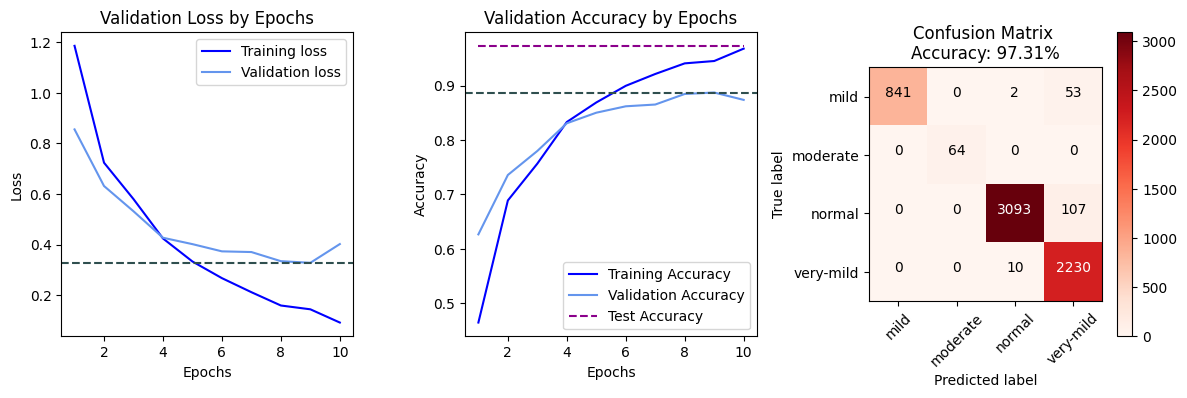

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model_cnn, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model_cnn, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="cnn")

### Hyperparameter tuning of Baseline CNN Model 2

Model architecture

In [ ]:

# Create a Sequential model
model_cnn = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation
# Specify the input shape as (image_size, image_size, 3)
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Add a MaxPooling2D layer with a 2x2 pool size
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters and a 3x3 kernel
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 128 filters and a 3x3 kernel
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output tensor from the previous layer
model_cnn.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model_cnn.add(Dense(128, activation='relu'))

# Add a final Dense layer with 4 units (one for each class) and softmax activation
model_cnn.add(Dense(4, activation='softmax'))

# Print the model summary
model_cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 174, 174, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 20, 128)     

Model Compilation

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

# Define the optimizer with a learning rate of 0.001, beta_1 = 0.9, and beta_2 = 0.999
#opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model, specifying the optimizer, loss function, and metrics
model_cnn.compile(optimizer= 'Adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

# Define an EarlyStopping callback to stop training if validation loss doesn't improve for 5 epochs
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpointer = ModelCheckpoint(filepath = '.alzheimer_cnn_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')



Model training

In [ ]:
import time

# Start the timer
tic = time.perf_counter()
history = model_cnn.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=30, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))


Epoch 1/30
77/77 [==============================] - 53s 664ms/step - loss: 1.2202 - accuracy: 0.4488 - val_loss: 0.8534 - val_accuracy: 0.6263
Epoch 2/30
77/77 [==============================] - 51s 659ms/step - loss: 0.7410 - accuracy: 0.6790 - val_loss: 0.6044 - val_accuracy: 0.7440
Epoch 3/30
77/77 [==============================] - 51s 658ms/step - loss: 0.5454 - accuracy: 0.7715 - val_loss: 0.5112 - val_accuracy: 0.8011
Epoch 4/30
77/77 [==============================] - 51s 658ms/step - loss: 0.4117 - accuracy: 0.8343 - val_loss: 0.4413 - val_accuracy: 0.8302
Epoch 5/30
77/77 [==============================] - 51s 656ms/step - loss: 0.3095 - accuracy: 0.8800 - val_loss: 0.3575 - val_accuracy: 0.8602
Epoch 6/30
77/77 [==============================] - 51s 656ms/step - loss: 0.2328 - accuracy: 0.9117 - val_loss: 0.3602 - val_accuracy: 0.8590
Epoch 7/30
77/77 [==============================] - 51s 660ms/step - loss: 0.1712 - accuracy: 0.9351 - val_loss: 0.3216 - val_accuracy: 0.8858

Model Evaluation

100/100 [==============================] - 1s 10ms/step

Model Accuracy: 97.91% on Test Data

              precision    recall  f1-score   support

        mild       0.97      1.00      0.98       896
    moderate       1.00      1.00      1.00        64
      normal       0.99      0.98      0.98      3200
   very-mild       0.97      0.97      0.97      2240

    accuracy                           0.98      6400
   macro avg       0.98      0.99      0.98      6400
weighted avg       0.98      0.98      0.98      6400



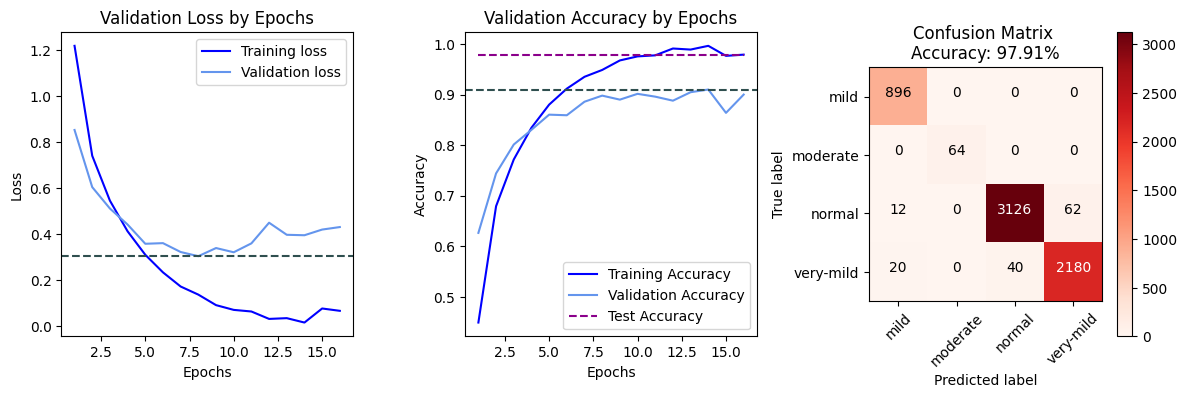

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model_cnn, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model_cnn, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="cnn")

###Baseline CNN Model 3 WITH IMG SIZE 176, LR, ADAM beta AND 50 EPOCHS, patience 5

Model Architecture

In [ ]:

# Create a Sequential model
model_cnn = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation
# Specify the input shape as (image_size, image_size, 3)
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Add a MaxPooling2D layer with a 2x2 pool size
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters and a 3x3 kernel
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 128 filters and a 3x3 kernel
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output tensor from the previous layer
model_cnn.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model_cnn.add(Dense(128, activation='relu'))

# Add a final Dense layer with 4 units (one for each class) and softmax activation
model_cnn.add(Dense(4, activation='softmax'))

# Print the model summary
model_cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 174, 174, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 20, 20, 128)     

Model Compilation

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

# Define the optimizer with a learning rate of 0.001, beta_1 = 0.9, and beta_2 = 0.999
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model, specifying the optimizer, loss function, and metrics
model_cnn.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

# Define an EarlyStopping callback to stop training if validation loss doesn't improve for 8 epochs
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

# Define a ModelCheckpoint callback to save the best model based on validation loss
checkpointer = ModelCheckpoint(filepath = '.alzheimer_cnn_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')



Model training

In [ ]:
import time

# Start the timer
tic = time.perf_counter()
history = model_cnn.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))


Epoch 1/50
77/77 [==============================] - 53s 664ms/step - loss: 1.1736 - accuracy: 0.4689 - val_loss: 0.8622 - val_accuracy: 0.6210
Epoch 2/50
77/77 [==============================] - 51s 661ms/step - loss: 0.7260 - accuracy: 0.6886 - val_loss: 0.6221 - val_accuracy: 0.7316
Epoch 3/50
77/77 [==============================] - 51s 661ms/step - loss: 0.5211 - accuracy: 0.7825 - val_loss: 0.4736 - val_accuracy: 0.8069
Epoch 4/50
77/77 [==============================] - 51s 661ms/step - loss: 0.4087 - accuracy: 0.8339 - val_loss: 0.3936 - val_accuracy: 0.8461
Epoch 5/50
77/77 [==============================] - 51s 662ms/step - loss: 0.3007 - accuracy: 0.8816 - val_loss: 0.3460 - val_accuracy: 0.8679
Epoch 6/50
77/77 [==============================] - 51s 658ms/step - loss: 0.2310 - accuracy: 0.9113 - val_loss: 0.3679 - val_accuracy: 0.8587
Epoch 7/50
77/77 [==============================] - 51s 667ms/step - loss: 0.1767 - accuracy: 0.9332 - val_loss: 0.2895 - val_accuracy: 0.8958

Model Evaluation

100/100 [==============================] - 1s 9ms/step

Model Accuracy: 98.02% on Test Data

              precision    recall  f1-score   support

        mild       0.99      1.00      0.99       896
    moderate       1.00      1.00      1.00        64
      normal       0.99      0.97      0.98      3200
   very-mild       0.96      0.98      0.97      2240

    accuracy                           0.98      6400
   macro avg       0.99      0.99      0.99      6400
weighted avg       0.98      0.98      0.98      6400



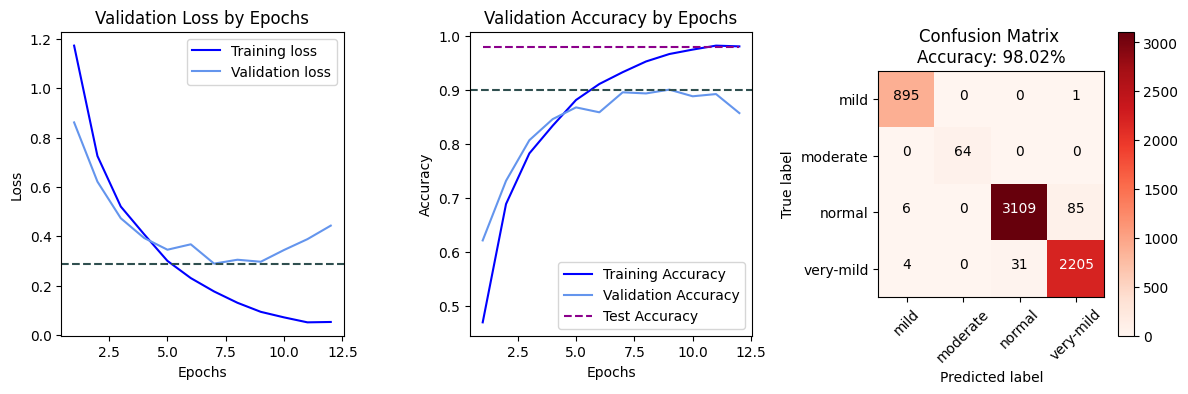

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model_cnn, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model_cnn, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="cnn")

#Transfer Learning Models

#Resnet152 IMG_size = 176

Model Architecture

In [ ]:
from tensorflow.keras.applications import ResNet152

resnet = ResNet152(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

234698864/234698864 [==============================] - 11s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 176, 176, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 182, 182, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 88, 88, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_resnet152_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')

tic = time.perf_counter()


Model Training

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 69s 757ms/step - loss: 4.9087 - accuracy: 0.3764 - val_loss: 1.0136 - val_accuracy: 0.5627
Epoch 2/50
77/77 [==============================] - 52s 671ms/step - loss: 1.0437 - accuracy: 0.5396 - val_loss: 1.0579 - val_accuracy: 0.5129
Epoch 3/50
77/77 [==============================] - 52s 674ms/step - loss: 1.0808 - accuracy: 0.5343 - val_loss: 1.1386 - val_accuracy: 0.4935
Epoch 4/50
77/77 [==============================] - 53s 684ms/step - loss: 1.1819 - accuracy: 0.5367 - val_loss: 0.9471 - val_accuracy: 0.6083
Epoch 5/50
77/77 [==============================] - 52s 672ms/step - loss: 1.1264 - accuracy: 0.5537 - val_loss: 1.6071 - val_accuracy: 0.4788
Epoch 6/50
77/77 [==============================] - 51s 663ms/step - loss: 1.3284 - accuracy: 0.5248 - val_loss: 1.0091 - val_accuracy: 0.5915
Epoch 7/50
77/77 [==============================] - 52s 667ms/step - loss: 0.8596 - accuracy: 0.6262 - val_loss: 1.6426 - val_accuracy: 0.4785

ResNet152 Evaluation

100/100 [==============================] - 7s 38ms/step

Model Accuracy: 71.84% on Test Data

              precision    recall  f1-score   support

        mild       0.56      0.86      0.68       896
    moderate       0.52      1.00      0.69        64
      normal       0.77      0.82      0.79      3200
   very-mild       0.77      0.51      0.61      2240

    accuracy                           0.72      6400
   macro avg       0.65      0.80      0.69      6400
weighted avg       0.74      0.72      0.71      6400



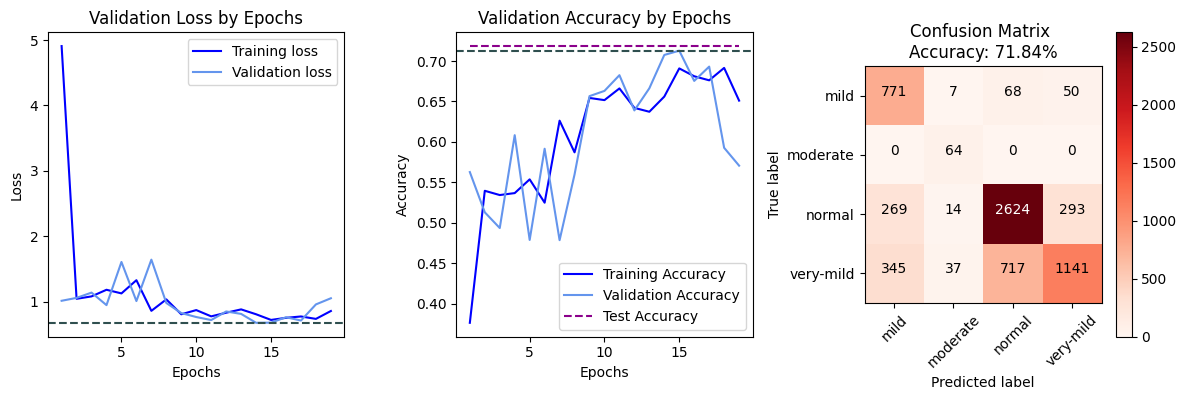

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="resnet152")

#Inceptionv3 *

Model Architecture

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

inception = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 176, 176, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 87, 87, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 87, 87, 32)  96          ['conv2d_17[0][0]']              
 alization)                                                                                       
                           

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionv3_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')




Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 63s 727ms/step - loss: 1.2069 - accuracy: 0.4615 - val_loss: 0.9754 - val_accuracy: 0.5877
Epoch 2/50
77/77 [==============================] - 51s 668ms/step - loss: 0.9316 - accuracy: 0.5982 - val_loss: 0.8755 - val_accuracy: 0.6227
Epoch 3/50
77/77 [==============================] - 52s 670ms/step - loss: 0.8678 - accuracy: 0.6243 - val_loss: 0.8376 - val_accuracy: 0.6460
Epoch 4/50
77/77 [==============================] - 51s 668ms/step - loss: 0.8197 - accuracy: 0.6479 - val_loss: 0.7944 - val_accuracy: 0.6624
Epoch 5/50
77/77 [==============================] - 51s 665ms/step - loss: 0.7896 - accuracy: 0.6621 - val_loss: 0.7922 - val_accuracy: 0.6495
Epoch 6/50
77/77 [==============================] - 51s 666ms/step - loss: 0.7792 - accuracy: 0.6652 - val_loss: 0.7571 - val_accuracy: 0.6807
Epoch 7/50
77/77 [==============================] - 51s 666ms/step - loss: 0.7520 - accuracy: 0.6792 - val_loss: 0.7439 - val_accuracy: 0.6860

InceptionV3 Evaluation

100/100 [==============================] - 4s 16ms/step

Model Accuracy: 70.33% on Test Data

              precision    recall  f1-score   support

        mild       0.48      0.85      0.62       896
    moderate       0.81      0.98      0.89        64
      normal       0.82      0.74      0.78      3200
   very-mild       0.71      0.58      0.64      2240

    accuracy                           0.70      6400
   macro avg       0.70      0.79      0.73      6400
weighted avg       0.73      0.70      0.71      6400



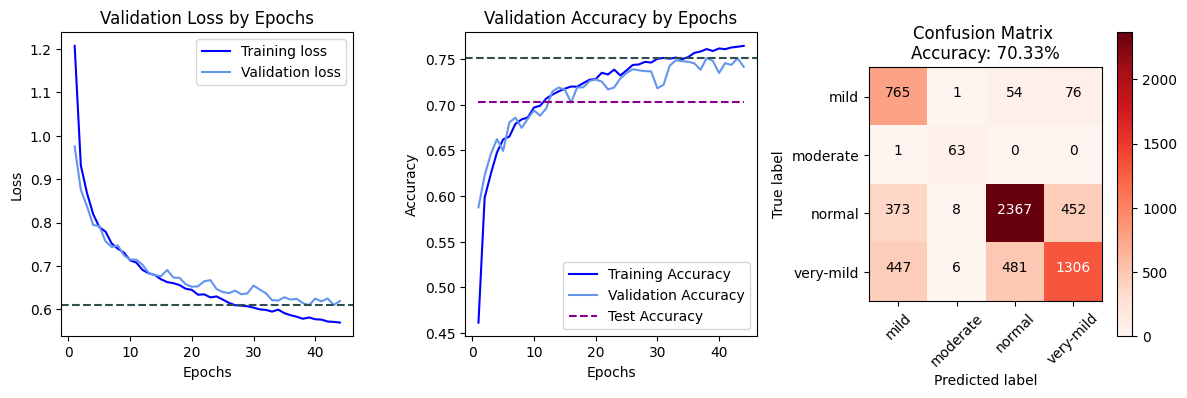

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")

#InceptionResNetV2


Model Architecture

In [ ]:
from tensorflow.keras.applications import  InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

inception = InceptionResNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()

219055592/219055592 [==============================] - 11s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 176, 176, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_111 (Conv2D)            (None, 87, 87, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 87, 87, 32)  96          ['conv2d_111[0][0]']             
 ormalization)                                                                                    
                        

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionvResV2_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')




Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 70s 750ms/step - loss: 1.1671 - accuracy: 0.4806 - val_loss: 0.9975 - val_accuracy: 0.5727
Epoch 2/50
77/77 [==============================] - 53s 682ms/step - loss: 0.9635 - accuracy: 0.5871 - val_loss: 0.8988 - val_accuracy: 0.6151
Epoch 3/50
77/77 [==============================] - 52s 678ms/step - loss: 0.8941 - accuracy: 0.6167 - val_loss: 0.8930 - val_accuracy: 0.6057
Epoch 4/50
77/77 [==============================] - 52s 681ms/step - loss: 0.8515 - accuracy: 0.6362 - val_loss: 0.8206 - val_accuracy: 0.6436
Epoch 5/50
77/77 [==============================] - 53s 682ms/step - loss: 0.8248 - accuracy: 0.6452 - val_loss: 0.8145 - val_accuracy: 0.6466
Epoch 6/50
77/77 [==============================] - 53s 683ms/step - loss: 0.8025 - accuracy: 0.6551 - val_loss: 0.7804 - val_accuracy: 0.6577
Epoch 7/50
77/77 [==============================] - 53s 689ms/step - loss: 0.7861 - accuracy: 0.6611 - val_loss: 0.7681 - val_accuracy: 0.6616

InceptionResNetV2 Evaluation

100/100 [==============================] - 6s 29ms/step

Model Accuracy: 68.58% on Test Data

              precision    recall  f1-score   support

        mild       0.45      0.83      0.59       896
    moderate       0.88      0.98      0.93        64
      normal       0.76      0.81      0.79      3200
   very-mild       0.77      0.44      0.56      2240

    accuracy                           0.69      6400
   macro avg       0.72      0.77      0.72      6400
weighted avg       0.72      0.69      0.68      6400



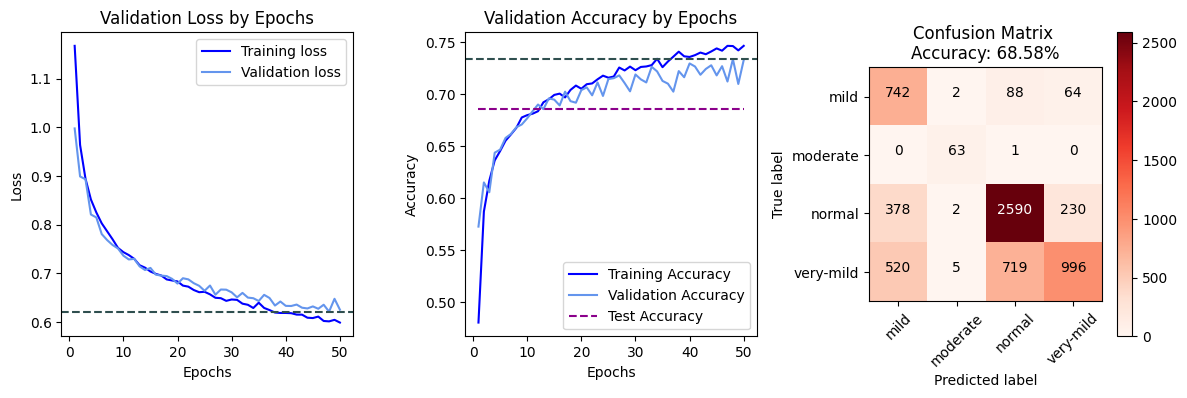

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")

#Resnet50

Model Architecture

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

#Make the ResNet50 layers non-trainable
for layer in resnet.layers:
    layer.trainable = False

# Modify the flatten layer and prediction layer
x = GlobalAveragePooling2D()(resnet.output)
prediction = Dense(4, activation='softmax')(x)

#Create the model using ResNet50
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()



94765736/94765736 [==============================] - 5s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 176, 176, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 182, 182, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 88, 88, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizati

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model, specifying the optimizer, loss function, and metrics
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss=tensorflow.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Update the model checkpoint file name
checkpointer = ModelCheckpoint(filepath='.alzheimer_resnet50_model.hdf5', monitor='val_loss',
                               save_best_only=True, mode='auto')


Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 57s 693ms/step - loss: 1.3583 - accuracy: 0.3098 - val_loss: 1.3267 - val_accuracy: 0.3393
Epoch 2/50
77/77 [==============================] - 51s 667ms/step - loss: 1.3078 - accuracy: 0.3753 - val_loss: 1.2855 - val_accuracy: 0.4014
Epoch 3/50
77/77 [==============================] - 52s 672ms/step - loss: 1.2757 - accuracy: 0.4077 - val_loss: 1.2551 - val_accuracy: 0.4282
Epoch 4/50
77/77 [==============================] - 51s 666ms/step - loss: 1.2530 - accuracy: 0.4232 - val_loss: 1.2383 - val_accuracy: 0.4194
Epoch 5/50
77/77 [==============================] - 51s 667ms/step - loss: 1.2361 - accuracy: 0.4362 - val_loss: 1.2184 - val_accuracy: 0.4414
Epoch 6/50
77/77 [==============================] - 52s 668ms/step - loss: 1.2214 - accuracy: 0.4472 - val_loss: 1.2065 - val_accuracy: 0.4679
Epoch 7/50
77/77 [==============================] - 52s 669ms/step - loss: 1.2079 - accuracy: 0.4616 - val_loss: 1.1904 - val_accuracy: 0.4841

ResNet50 Evaluation

100/100 [==============================] - 3s 20ms/step

Model Accuracy: 51.63% on Test Data

              precision    recall  f1-score   support

        mild       0.27      0.71      0.40       896
    moderate       0.14      0.95      0.25        64
      normal       0.73      0.68      0.70      3200
   very-mild       0.65      0.20      0.30      2240

    accuracy                           0.52      6400
   macro avg       0.45      0.63      0.41      6400
weighted avg       0.63      0.52      0.51      6400



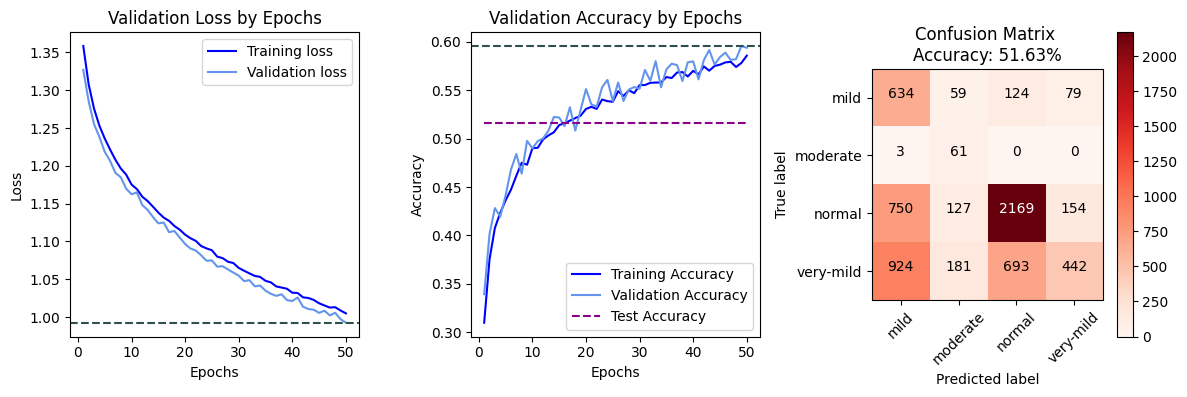

In [ ]:
#Test the model and visualize the metrics
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred,
                           ['mild', 'moderate', 'normal', 'very-mild'], model_name="resnet50")


#VGG19 with 176


Model Architecture

In [ ]:
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

80134624/80134624 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 176, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 176, 176, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 176, 176, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 88, 88, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 88, 88, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 88, 88, 128)       147584    
                                                              

Model Compilation & Training

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

opt = optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath = '.alzheimer_vgg19_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))

Epoch 1/50
77/77 [==============================] - 68s 723ms/step - loss: 1.1009 - accuracy: 0.5389 - val_loss: 0.7912 - val_accuracy: 0.6828
Epoch 2/50
77/77 [==============================] - 51s 662ms/step - loss: 0.7307 - accuracy: 0.7145 - val_loss: 0.6582 - val_accuracy: 0.7525
Epoch 3/50
77/77 [==============================] - 51s 663ms/step - loss: 0.6389 - accuracy: 0.7501 - val_loss: 0.6081 - val_accuracy: 0.7593
Epoch 4/50
77/77 [==============================] - 51s 661ms/step - loss: 0.5735 - accuracy: 0.7815 - val_loss: 0.5470 - val_accuracy: 0.7913
Epoch 5/50
77/77 [==============================] - 51s 667ms/step - loss: 0.5309 - accuracy: 0.8009 - val_loss: 0.5247 - val_accuracy: 0.8008
Epoch 6/50
77/77 [==============================] - 51s 662ms/step - loss: 0.4989 - accuracy: 0.8141 - val_loss: 0.5011 - val_accuracy: 0.7972
Epoch 7/50
77/77 [==============================] - 51s 659ms/step - loss: 0.4725 - accuracy: 0.8268 - val_loss: 0.4705 - val_accuracy: 0.8128

Model Evaluation

100/100 [==============================] - 4s 29ms/step

Model Accuracy: 93.30% on Test Data

              precision    recall  f1-score   support

        mild       0.95      0.97      0.96       896
    moderate       1.00      1.00      1.00        64
      normal       0.95      0.93      0.94      3200
   very-mild       0.90      0.92      0.91      2240

    accuracy                           0.93      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.93      0.93      0.93      6400



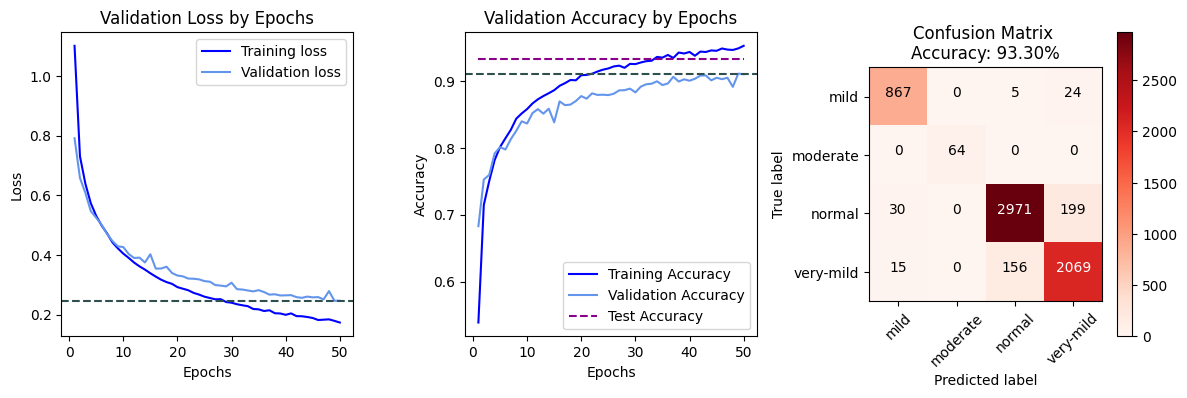

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild','moderate','normal','very-mild'], model_name = "vgg19")

#vgg16 with 176

Model Architecture

In [ ]:
# Create VGG16 base model
vgg_16 = VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the layers of VGG16
for layer in vgg_16.layers:
    layer.trainable = False
x = Flatten()(vgg_16.output)

prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg_16.input, outputs=prediction)
model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 176, 176, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 176, 176, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 176, 176, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 88, 88, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 88, 88, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 88, 88, 128)       147584    
                                                            

Model Compilation

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

opt = optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath = '.alzheimer_vgg19_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')


Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))

Epoch 1/50
77/77 [==============================] - 53s 672ms/step - loss: 1.0218 - accuracy: 0.5803 - val_loss: 0.7461 - val_accuracy: 0.7104
Epoch 2/50
77/77 [==============================] - 51s 664ms/step - loss: 0.6762 - accuracy: 0.7393 - val_loss: 0.6277 - val_accuracy: 0.7552
Epoch 3/50
77/77 [==============================] - 51s 664ms/step - loss: 0.5741 - accuracy: 0.7836 - val_loss: 0.5383 - val_accuracy: 0.7990
Epoch 4/50
77/77 [==============================] - 51s 667ms/step - loss: 0.5247 - accuracy: 0.7984 - val_loss: 0.4931 - val_accuracy: 0.8146
Epoch 5/50
77/77 [==============================] - 52s 668ms/step - loss: 0.4700 - accuracy: 0.8269 - val_loss: 0.4596 - val_accuracy: 0.8267
Epoch 6/50
77/77 [==============================] - 51s 663ms/step - loss: 0.4338 - accuracy: 0.8444 - val_loss: 0.4437 - val_accuracy: 0.8314
Epoch 7/50
77/77 [==============================] - 51s 664ms/step - loss: 0.4089 - accuracy: 0.8545 - val_loss: 0.4215 - val_accuracy: 0.8414

Model Evaluation

100/100 [==============================] - 3s 26ms/step

Model Accuracy: 95.30% on Test Data

              precision    recall  f1-score   support

        mild       0.97      0.96      0.96       896
    moderate       1.00      1.00      1.00        64
      normal       0.96      0.96      0.96      3200
   very-mild       0.94      0.94      0.94      2240

    accuracy                           0.95      6400
   macro avg       0.97      0.96      0.97      6400
weighted avg       0.95      0.95      0.95      6400



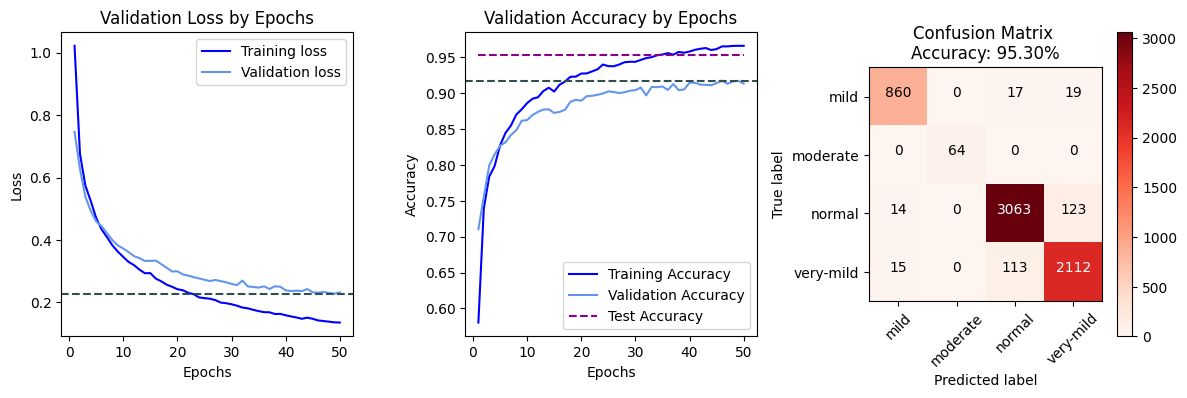

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg16")

#Transfer Learning with 256 image size

In [ ]:
# Define the class labels
class_labels = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Define the desired image size and dimension

IMG_SIZE = 256
IMAGE_SIZE = [256, 256]
DIM = (IMG_SIZE, IMG_SIZE)

# Resnet152 *

Model Architecture

In [ ]:
from tensorflow.keras.applications import ResNet152

resnet = ResNet152(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_resnet152_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')

tic = time.perf_counter()


Model Training

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 98s 1s/step - loss: 3.0992 - accuracy: 0.3549 - val_loss: 1.1259 - val_accuracy: 0.5188
Epoch 2/50
77/77 [==============================] - 77s 1s/step - loss: 1.0209 - accuracy: 0.5555 - val_loss: 1.0308 - val_accuracy: 0.5300
Epoch 3/50
77/77 [==============================] - 77s 999ms/step - loss: 1.0221 - accuracy: 0.5487 - val_loss: 0.9412 - val_accuracy: 0.5665
Epoch 4/50
77/77 [==============================] - 76s 979ms/step - loss: 0.9274 - accuracy: 0.5998 - val_loss: 1.1228 - val_accuracy: 0.6136
Epoch 5/50
77/77 [==============================] - 77s 991ms/step - loss: 0.8818 - accuracy: 0.6245 - val_loss: 0.7577 - val_accuracy: 0.6939
Epoch 6/50
77/77 [==============================] - 75s 964ms/step - loss: 0.8577 - accuracy: 0.6373 - val_loss: 1.3774 - val_accuracy: 0.4226
Epoch 7/50
77/77 [==============================] - 77s 997ms/step - loss: 0.8643 - accuracy: 0.6322 - val_loss: 0.7559 - val_accuracy: 0.6698
Epoch

ResNet152 Evaluation

100/100 [==============================] - 11s 71ms/step

Model Accuracy: 77.61% on Test Data

              precision    recall  f1-score   support

        mild       0.58      0.94      0.71       896
    moderate       0.97      1.00      0.98        64
      normal       0.85      0.80      0.83      3200
   very-mild       0.80      0.67      0.73      2240

    accuracy                           0.78      6400
   macro avg       0.80      0.85      0.81      6400
weighted avg       0.80      0.78      0.78      6400



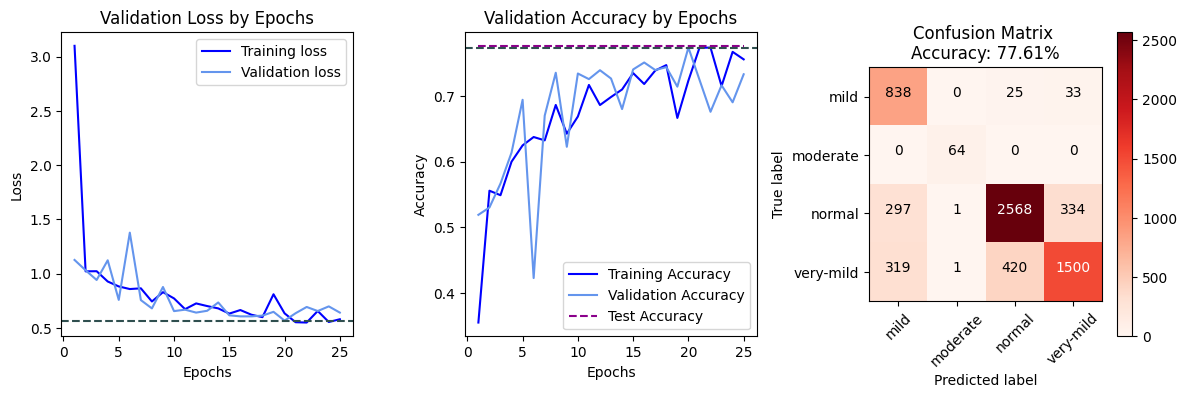

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="resnet152")

#Inceptionv3

Model Architecture

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

inception = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionv3_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')




Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 92s 1s/step - loss: 1.1442 - accuracy: 0.4932 - val_loss: 0.9992 - val_accuracy: 0.5724
Epoch 2/50
77/77 [==============================] - 75s 970ms/step - loss: 0.9524 - accuracy: 0.5931 - val_loss: 0.9056 - val_accuracy: 0.6112
Epoch 3/50
77/77 [==============================] - 75s 967ms/step - loss: 0.8823 - accuracy: 0.6216 - val_loss: 0.8650 - val_accuracy: 0.6268
Epoch 4/50
77/77 [==============================] - 75s 968ms/step - loss: 0.8410 - accuracy: 0.6416 - val_loss: 0.8234 - val_accuracy: 0.6551
Epoch 5/50
77/77 [==============================] - 74s 962ms/step - loss: 0.8120 - accuracy: 0.6540 - val_loss: 0.8261 - val_accuracy: 0.6318
Epoch 6/50
77/77 [==============================] - 75s 969ms/step - loss: 0.7883 - accuracy: 0.6644 - val_loss: 0.7811 - val_accuracy: 0.6701
Epoch 7/50
77/77 [==============================] - 75s 970ms/step - loss: 0.7677 - accuracy: 0.6758 - val_loss: 0.7655 - val_accuracy: 0.6654
Ep

InceptionV3 Evaluation

100/100 [==============================] - 5s 30ms/step

Model Accuracy: 68.91% on Test Data

              precision    recall  f1-score   support

        mild       0.52      0.81      0.63       896
    moderate       0.89      0.97      0.93        64
      normal       0.89      0.61      0.72      3200
   very-mild       0.61      0.74      0.67      2240

    accuracy                           0.69      6400
   macro avg       0.73      0.78      0.74      6400
weighted avg       0.74      0.69      0.69      6400



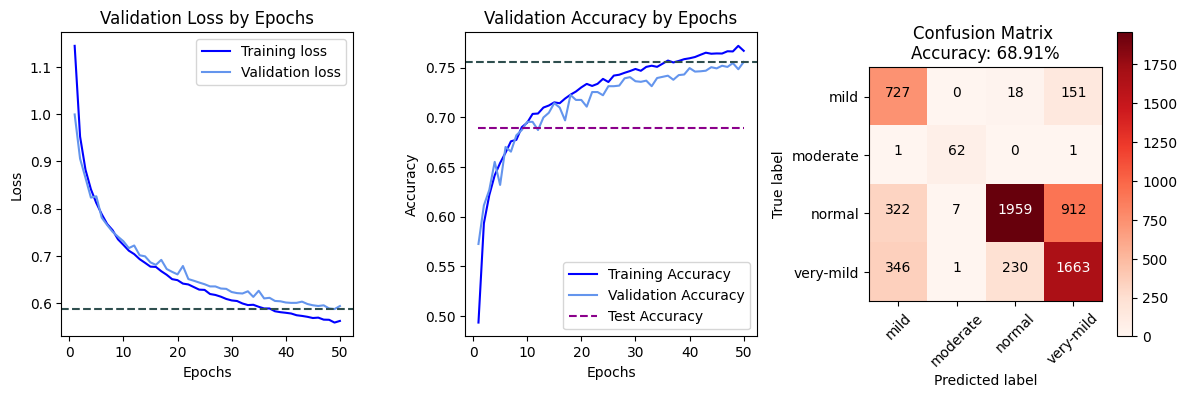

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")

#InceptionResNetV2 *


Model Architecture

In [ ]:
from tensorflow.keras.applications import  InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

inception = InceptionResNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()

219055592/219055592 [==============================] - 11s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)          

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionvResV2_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')




Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 100s 1s/step - loss: 1.2504 - accuracy: 0.4278 - val_loss: 1.0886 - val_accuracy: 0.5321
Epoch 2/50
77/77 [==============================] - 76s 987ms/step - loss: 1.0314 - accuracy: 0.5658 - val_loss: 0.9689 - val_accuracy: 0.6004
Epoch 3/50
77/77 [==============================] - 76s 989ms/step - loss: 0.9521 - accuracy: 0.6060 - val_loss: 0.9257 - val_accuracy: 0.6068
Epoch 4/50
77/77 [==============================] - 76s 988ms/step - loss: 0.9008 - accuracy: 0.6262 - val_loss: 0.8661 - val_accuracy: 0.6421
Epoch 5/50
77/77 [==============================] - 76s 985ms/step - loss: 0.8654 - accuracy: 0.6402 - val_loss: 0.8495 - val_accuracy: 0.6566
Epoch 6/50
77/77 [==============================] - 76s 991ms/step - loss: 0.8367 - accuracy: 0.6534 - val_loss: 0.8195 - val_accuracy: 0.6642
Epoch 7/50
77/77 [==============================] - 76s 991ms/step - loss: 0.8156 - accuracy: 0.6599 - val_loss: 0.8012 - val_accuracy: 0.6622
E

InceptionResNetV2 Evaluation

100/100 [==============================] - 10s 59ms/step

Model Accuracy: 69.47% on Test Data

              precision    recall  f1-score   support

        mild       0.50      0.79      0.61       896
    moderate       0.94      0.98      0.96        64
      normal       0.83      0.69      0.76      3200
   very-mild       0.65      0.65      0.65      2240

    accuracy                           0.69      6400
   macro avg       0.73      0.78      0.74      6400
weighted avg       0.72      0.69      0.70      6400



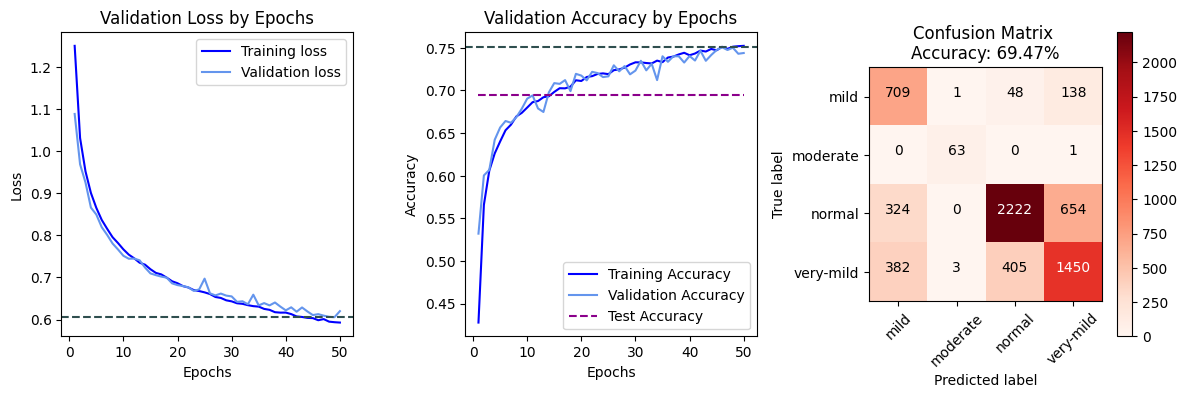

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")



#Resnet50 *

Model Architecture

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

#Make the ResNet50 layers non-trainable
for layer in resnet.layers:
    layer.trainable = False

# Modify the flatten layer and prediction layer
x = GlobalAveragePooling2D()(resnet.output)
prediction = Dense(4, activation='softmax')(x)

#Create the model using ResNet50
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()



94765736/94765736 [==============================] - 6s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model, specifying the optimizer, loss function, and metrics
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss=tensorflow.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Update the model checkpoint file name
checkpointer = ModelCheckpoint(filepath='.alzheimer_resnet50_model.hdf5', monitor='val_loss',
                               save_best_only=True, mode='auto')


Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 81s 1s/step - loss: 1.4008 - accuracy: 0.2801 - val_loss: 1.3573 - val_accuracy: 0.3364
Epoch 2/50
77/77 [==============================] - 75s 973ms/step - loss: 1.3446 - accuracy: 0.3300 - val_loss: 1.3345 - val_accuracy: 0.3455
Epoch 3/50
77/77 [==============================] - 75s 975ms/step - loss: 1.3287 - accuracy: 0.3441 - val_loss: 1.3230 - val_accuracy: 0.3355
Epoch 4/50
77/77 [==============================] - 76s 980ms/step - loss: 1.3140 - accuracy: 0.3601 - val_loss: 1.3027 - val_accuracy: 0.3840
Epoch 5/50
77/77 [==============================] - 75s 975ms/step - loss: 1.3026 - accuracy: 0.3711 - val_loss: 1.2970 - val_accuracy: 0.3961
Epoch 6/50
77/77 [==============================] - 75s 978ms/step - loss: 1.2908 - accuracy: 0.3841 - val_loss: 1.2843 - val_accuracy: 0.3820
Epoch 7/50
77/77 [==============================] - 75s 970ms/step - loss: 1.2799 - accuracy: 0.3968 - val_loss: 1.2712 - val_accuracy: 0.4026
Ep

ResNet50 Evaluation

100/100 [==============================] - 5s 40ms/step

Model Accuracy: 52.30% on Test Data

              precision    recall  f1-score   support

        mild       0.30      0.72      0.43       896
    moderate       0.13      0.84      0.23        64
      normal       0.72      0.65      0.68      3200
   very-mild       0.59      0.25      0.35      2240

    accuracy                           0.52      6400
   macro avg       0.44      0.62      0.42      6400
weighted avg       0.61      0.52      0.53      6400



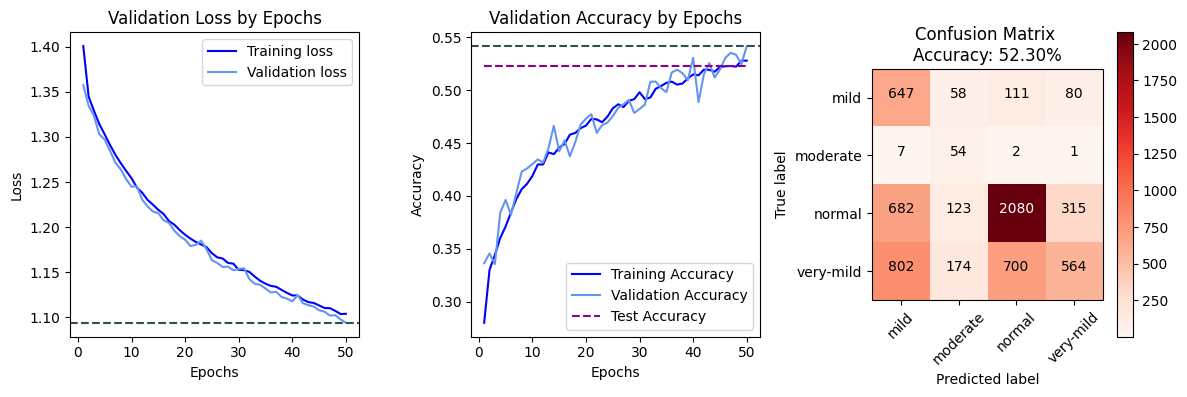

In [ ]:
#Test the model and visualize the metrics
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred,
                           ['mild', 'moderate', 'normal', 'very-mild'], model_name="resnet50")


#VGG Models

In [ ]:
# Define the class labels
#class_labels = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Define the desired image size and dimension

#IMG_SIZE = 256
#IMAGE_SIZE = [256, 256]
#DIM = (IMG_SIZE, IMG_SIZE)

#VGG19 with 256


In [ ]:
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

opt = optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath = '.alzheimer_vgg19_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')


In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))

Epoch 1/50
77/77 [==============================] - 96s 1s/step - loss: 1.2455 - accuracy: 0.5529 - val_loss: 0.7075 - val_accuracy: 0.7201
Epoch 2/50
77/77 [==============================] - 75s 965ms/step - loss: 0.6321 - accuracy: 0.7547 - val_loss: 0.5579 - val_accuracy: 0.7964
Epoch 3/50
77/77 [==============================] - 74s 961ms/step - loss: 0.5204 - accuracy: 0.8093 - val_loss: 0.4834 - val_accuracy: 0.8199
Epoch 4/50
77/77 [==============================] - 75s 965ms/step - loss: 0.4384 - accuracy: 0.8520 - val_loss: 0.4573 - val_accuracy: 0.8340
Epoch 5/50
77/77 [==============================] - 75s 966ms/step - loss: 0.3933 - accuracy: 0.8695 - val_loss: 0.4062 - val_accuracy: 0.8505
Epoch 6/50
77/77 [==============================] - 75s 968ms/step - loss: 0.3503 - accuracy: 0.8892 - val_loss: 0.3612 - val_accuracy: 0.8776
Epoch 7/50
77/77 [==============================] - 74s 954ms/step - loss: 0.3290 - accuracy: 0.8932 - val_loss: 0.3734 - val_accuracy: 0.8558
Ep

100/100 [==============================] - 8s 58ms/step

Model Accuracy: 96.58% on Test Data

              precision    recall  f1-score   support

        mild       0.97      1.00      0.99       896
    moderate       1.00      1.00      1.00        64
      normal       0.99      0.94      0.97      3200
   very-mild       0.93      0.99      0.96      2240

    accuracy                           0.97      6400
   macro avg       0.97      0.98      0.98      6400
weighted avg       0.97      0.97      0.97      6400



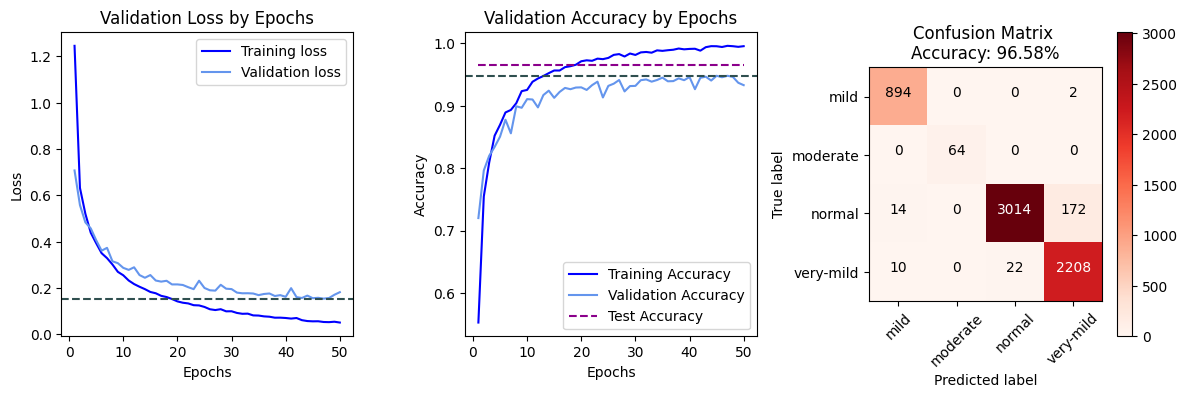

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild','moderate','normal','very-mild'], model_name = "vgg19")

#vgg16 with 256 *

In [ ]:
# Create VGG16 base model
vgg_16 = VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the layers of VGG16
for layer in vgg_16.layers:
    layer.trainable = False
x = Flatten()(vgg_16.output)

prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg_16.input, outputs=prediction)
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                            

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

opt = optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath = '.alzheimer_vgg19_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))

Epoch 1/50
77/77 [==============================] - 76s 977ms/step - loss: 1.0643 - accuracy: 0.5891 - val_loss: 0.6387 - val_accuracy: 0.7496
Epoch 2/50
77/77 [==============================] - 75s 966ms/step - loss: 0.5681 - accuracy: 0.7877 - val_loss: 0.5000 - val_accuracy: 0.8199
Epoch 3/50
77/77 [==============================] - 75s 968ms/step - loss: 0.4558 - accuracy: 0.8425 - val_loss: 0.4282 - val_accuracy: 0.8464
Epoch 4/50
77/77 [==============================] - 74s 959ms/step - loss: 0.3888 - accuracy: 0.8725 - val_loss: 0.3867 - val_accuracy: 0.8611
Epoch 5/50
77/77 [==============================] - 74s 957ms/step - loss: 0.3359 - accuracy: 0.8965 - val_loss: 0.3385 - val_accuracy: 0.8808
Epoch 6/50
77/77 [==============================] - 74s 962ms/step - loss: 0.2999 - accuracy: 0.9106 - val_loss: 0.3215 - val_accuracy: 0.8867
Epoch 7/50
77/77 [==============================] - 74s 961ms/step - loss: 0.2693 - accuracy: 0.9227 - val_loss: 0.3575 - val_accuracy: 0.8587

100/100 [==============================] - 5s 52ms/step

Model Accuracy: 98.70% on Test Data

              precision    recall  f1-score   support

        mild       0.99      1.00      0.99       896
    moderate       1.00      1.00      1.00        64
      normal       0.98      0.99      0.99      3200
   very-mild       0.99      0.98      0.98      2240

    accuracy                           0.99      6400
   macro avg       0.99      0.99      0.99      6400
weighted avg       0.99      0.99      0.99      6400



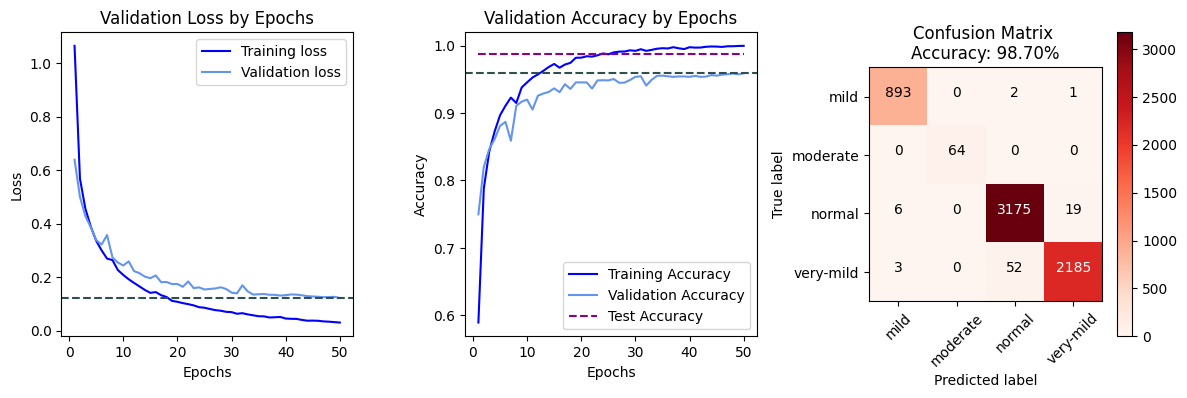

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg16")

Hyper parameter tuning of VGG Models

#With LR of 0.0001 and 0.01

VGG19 with LR


Model Architecture

In [ ]:
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

Model Compilation

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

opt = optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath = '.alzheimer_vgg19_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')


MOdel Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))

Epoch 1/50
77/77 [==============================] - 96s 1s/step - loss: 1.2414 - accuracy: 0.4631 - val_loss: 1.0232 - val_accuracy: 0.6189
Epoch 2/50
77/77 [==============================] - 74s 963ms/step - loss: 0.9353 - accuracy: 0.6507 - val_loss: 0.8513 - val_accuracy: 0.6795
Epoch 3/50
77/77 [==============================] - 74s 960ms/step - loss: 0.8136 - accuracy: 0.6914 - val_loss: 0.7658 - val_accuracy: 0.7013
Epoch 4/50
77/77 [==============================] - 74s 954ms/step - loss: 0.7386 - accuracy: 0.7192 - val_loss: 0.7040 - val_accuracy: 0.7290
Epoch 5/50
77/77 [==============================] - 75s 965ms/step - loss: 0.6866 - accuracy: 0.7397 - val_loss: 0.6575 - val_accuracy: 0.7619
Epoch 6/50
77/77 [==============================] - 74s 957ms/step - loss: 0.6436 - accuracy: 0.7585 - val_loss: 0.6252 - val_accuracy: 0.7707
Epoch 7/50
77/77 [==============================] - 74s 962ms/step - loss: 0.6085 - accuracy: 0.7760 - val_loss: 0.5956 - val_accuracy: 0.7816
Ep

Model Evaluation

100/100 [==============================] - 8s 60ms/step

Model Accuracy: 91.50% on Test Data

              precision    recall  f1-score   support

        mild       0.89      0.96      0.92       896
    moderate       1.00      1.00      1.00        64
      normal       0.93      0.92      0.93      3200
   very-mild       0.90      0.88      0.89      2240

    accuracy                           0.92      6400
   macro avg       0.93      0.94      0.94      6400
weighted avg       0.92      0.92      0.91      6400



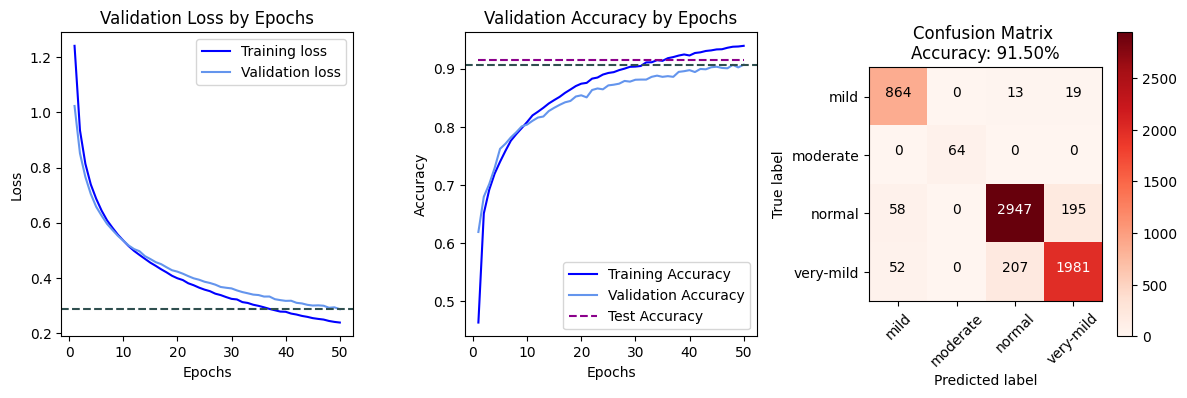

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild','moderate','normal','very-mild'], model_name = "vgg19")

vgg16 with LR 0.01

Model Architecture

In [ ]:
# Create VGG16 base model
vgg_16 = VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the layers of VGG16
for layer in vgg_16.layers:
    layer.trainable = False
x = Flatten()(vgg_16.output)

prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg_16.input, outputs=prediction)
model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                            

MOdel Compilation and training

In [ ]:
from keras.optimizers import learning_rate_schedule
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint

opt = optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer= opt,
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath = '.alzheimer_vgg19_model.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50, callbacks= [callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60,2)))

Epoch 1/50
77/77 [==============================] - 76s 972ms/step - loss: 1.1277 - accuracy: 0.5405 - val_loss: 0.9241 - val_accuracy: 0.6645
Epoch 2/50
77/77 [==============================] - 74s 959ms/step - loss: 0.8401 - accuracy: 0.6988 - val_loss: 0.7610 - val_accuracy: 0.7190
Epoch 3/50
77/77 [==============================] - 73s 951ms/step - loss: 0.7204 - accuracy: 0.7416 - val_loss: 0.6765 - val_accuracy: 0.7516
Epoch 4/50
77/77 [==============================] - 75s 965ms/step - loss: 0.6510 - accuracy: 0.7663 - val_loss: 0.6320 - val_accuracy: 0.7643
Epoch 5/50
77/77 [==============================] - 74s 961ms/step - loss: 0.6004 - accuracy: 0.7851 - val_loss: 0.5809 - val_accuracy: 0.7896
Epoch 6/50
77/77 [==============================] - 74s 962ms/step - loss: 0.5613 - accuracy: 0.8017 - val_loss: 0.5461 - val_accuracy: 0.8072
Epoch 7/50
77/77 [==============================] - 74s 959ms/step - loss: 0.5307 - accuracy: 0.8152 - val_loss: 0.5189 - val_accuracy: 0.8222

Model Evaluation

100/100 [==============================] - 5s 52ms/step

Model Accuracy: 94.67% on Test Data

              precision    recall  f1-score   support

        mild       0.96      0.99      0.97       896
    moderate       1.00      1.00      1.00        64
      normal       0.95      0.95      0.95      3200
   very-mild       0.94      0.92      0.93      2240

    accuracy                           0.95      6400
   macro avg       0.96      0.97      0.96      6400
weighted avg       0.95      0.95      0.95      6400



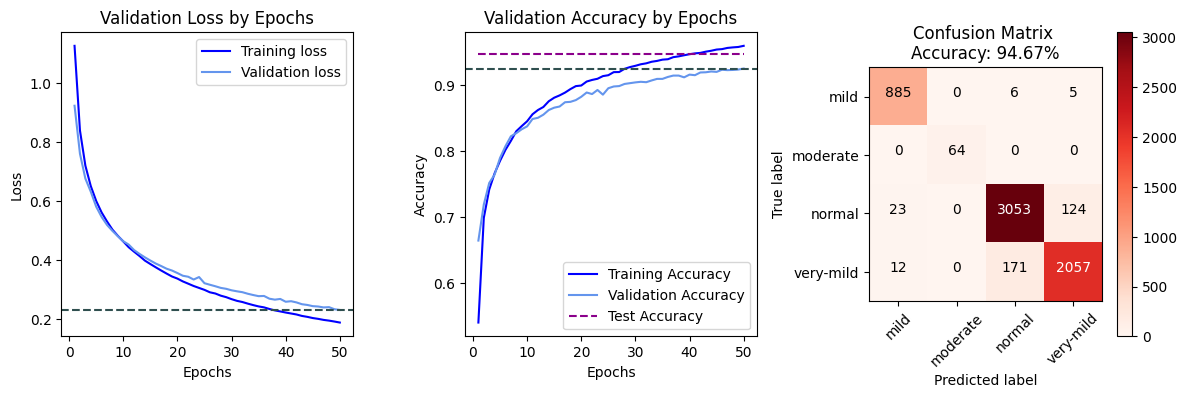

In [ ]:
# Prepare for testing
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg16")

# Resnet152

Model Architecture

In [ ]:
from tensorflow.keras.applications import ResNet152

resnet = ResNet152(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_resnet152_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')

tic = time.perf_counter()


Model Training

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 98s 1s/step - loss: 3.0992 - accuracy: 0.3549 - val_loss: 1.1259 - val_accuracy: 0.5188
Epoch 2/50
77/77 [==============================] - 77s 1s/step - loss: 1.0209 - accuracy: 0.5555 - val_loss: 1.0308 - val_accuracy: 0.5300
Epoch 3/50
77/77 [==============================] - 77s 999ms/step - loss: 1.0221 - accuracy: 0.5487 - val_loss: 0.9412 - val_accuracy: 0.5665
Epoch 4/50
77/77 [==============================] - 76s 979ms/step - loss: 0.9274 - accuracy: 0.5998 - val_loss: 1.1228 - val_accuracy: 0.6136
Epoch 5/50
77/77 [==============================] - 77s 991ms/step - loss: 0.8818 - accuracy: 0.6245 - val_loss: 0.7577 - val_accuracy: 0.6939
Epoch 6/50
77/77 [==============================] - 75s 964ms/step - loss: 0.8577 - accuracy: 0.6373 - val_loss: 1.3774 - val_accuracy: 0.4226
Epoch 7/50
77/77 [==============================] - 77s 997ms/step - loss: 0.8643 - accuracy: 0.6322 - val_loss: 0.7559 - val_accuracy: 0.6698
Epoch

ResNet152 Evaluation

100/100 [==============================] - 11s 71ms/step

Model Accuracy: 77.61% on Test Data

              precision    recall  f1-score   support

        mild       0.58      0.94      0.71       896
    moderate       0.97      1.00      0.98        64
      normal       0.85      0.80      0.83      3200
   very-mild       0.80      0.67      0.73      2240

    accuracy                           0.78      6400
   macro avg       0.80      0.85      0.81      6400
weighted avg       0.80      0.78      0.78      6400



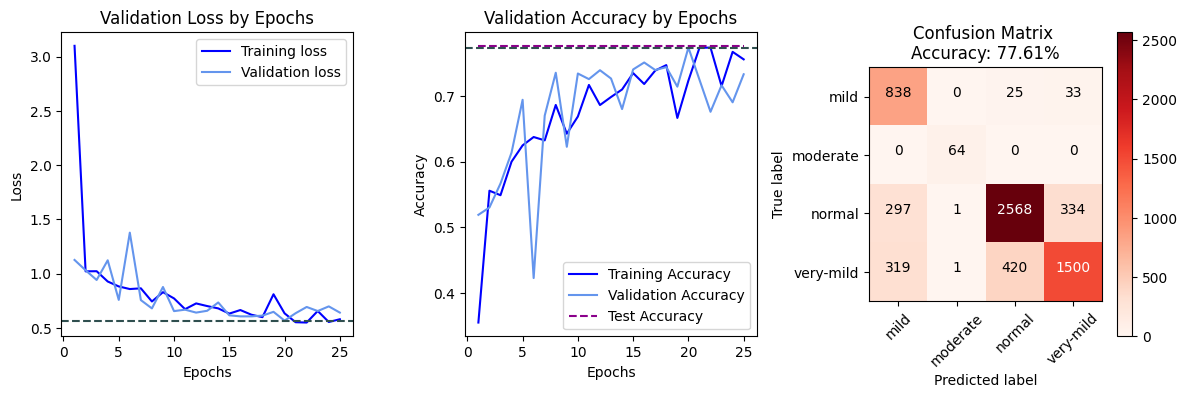

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="resnet152")

#InceptionResNetV2


Model Architecture

In [ ]:
from tensorflow.keras.applications import  InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

inception = InceptionResNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inception.output)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
model.summary()

219055592/219055592 [==============================] - 11s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)          

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionvResV2_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')




Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 100s 1s/step - loss: 1.2504 - accuracy: 0.4278 - val_loss: 1.0886 - val_accuracy: 0.5321
Epoch 2/50
77/77 [==============================] - 76s 987ms/step - loss: 1.0314 - accuracy: 0.5658 - val_loss: 0.9689 - val_accuracy: 0.6004
Epoch 3/50
77/77 [==============================] - 76s 989ms/step - loss: 0.9521 - accuracy: 0.6060 - val_loss: 0.9257 - val_accuracy: 0.6068
Epoch 4/50
77/77 [==============================] - 76s 988ms/step - loss: 0.9008 - accuracy: 0.6262 - val_loss: 0.8661 - val_accuracy: 0.6421
Epoch 5/50
77/77 [==============================] - 76s 985ms/step - loss: 0.8654 - accuracy: 0.6402 - val_loss: 0.8495 - val_accuracy: 0.6566
Epoch 6/50
77/77 [==============================] - 76s 991ms/step - loss: 0.8367 - accuracy: 0.6534 - val_loss: 0.8195 - val_accuracy: 0.6642
Epoch 7/50
77/77 [==============================] - 76s 991ms/step - loss: 0.8156 - accuracy: 0.6599 - val_loss: 0.8012 - val_accuracy: 0.6622
E

InceptionResNetV2 Evaluation

100/100 [==============================] - 10s 59ms/step

Model Accuracy: 69.47% on Test Data

              precision    recall  f1-score   support

        mild       0.50      0.79      0.61       896
    moderate       0.94      0.98      0.96        64
      normal       0.83      0.69      0.76      3200
   very-mild       0.65      0.65      0.65      2240

    accuracy                           0.69      6400
   macro avg       0.73      0.78      0.74      6400
weighted avg       0.72      0.69      0.70      6400



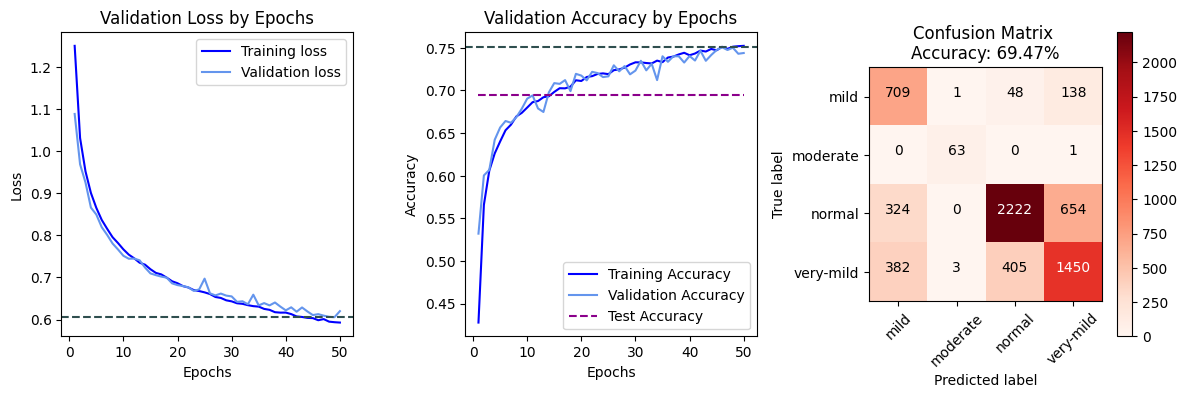

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")

#adding filters and strides to inceptionv3 but generalises poorly *

Model Architecture

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D

# Load the InceptionV3 model without the top layers
base_model = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the base model layers
base_model.trainable = False

# Add your own classification layers
x = base_model.output
x = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

# Create the modified model
model = Model(inputs=base_model.input, outputs=prediction)
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

Model Compilation

In [ ]:
# Compile the model and specify the optimizer, loss, and metrics
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionv3_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')


Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=50,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))

Epoch 1/50
77/77 [==============================] - 91s 1s/step - loss: 1.0585 - accuracy: 0.5333 - val_loss: 0.8195 - val_accuracy: 0.6527
Epoch 2/50
77/77 [==============================] - 74s 962ms/step - loss: 0.7538 - accuracy: 0.6718 - val_loss: 0.7059 - val_accuracy: 0.6913
Epoch 3/50
77/77 [==============================] - 74s 959ms/step - loss: 0.6560 - accuracy: 0.7185 - val_loss: 0.6565 - val_accuracy: 0.7113
Epoch 4/50
77/77 [==============================] - 74s 957ms/step - loss: 0.5834 - accuracy: 0.7576 - val_loss: 0.5851 - val_accuracy: 0.7590
Epoch 5/50
77/77 [==============================] - 74s 961ms/step - loss: 0.5308 - accuracy: 0.7843 - val_loss: 0.5312 - val_accuracy: 0.7849
Epoch 6/50
77/77 [==============================] - 73s 952ms/step - loss: 0.4766 - accuracy: 0.8121 - val_loss: 0.5709 - val_accuracy: 0.7557
Epoch 7/50
77/77 [==============================] - 74s 960ms/step - loss: 0.4448 - accuracy: 0.8250 - val_loss: 0.4574 - val_accuracy: 0.8167
Ep

Model Evaluation

100/100 [==============================] - 6s 31ms/step

Model Accuracy: 95.44% on Test Data

              precision    recall  f1-score   support

        mild       0.96      0.99      0.97       896
    moderate       1.00      1.00      1.00        64
      normal       0.95      0.97      0.96      3200
   very-mild       0.96      0.92      0.94      2240

    accuracy                           0.95      6400
   macro avg       0.97      0.97      0.97      6400
weighted avg       0.95      0.95      0.95      6400



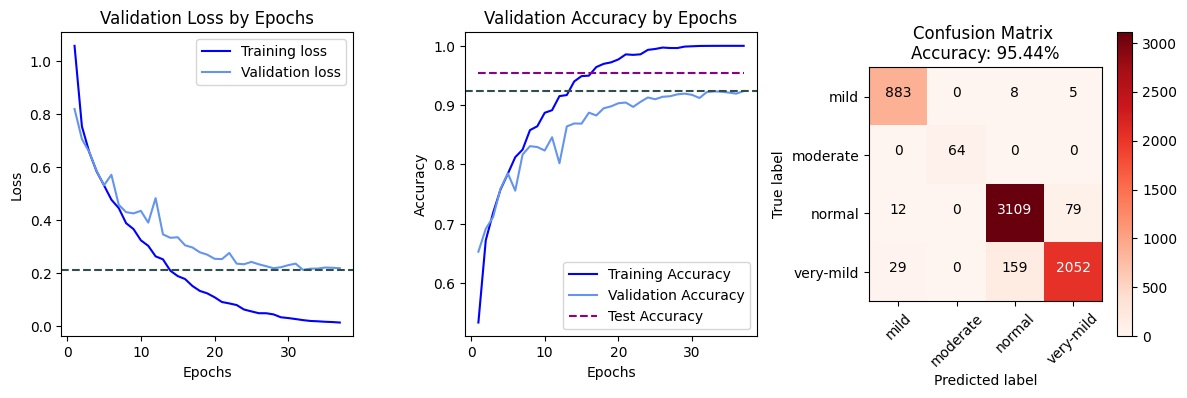

In [ ]:
y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")

#VGG19 test and trials

Model Compilation

In [ ]:
from keras.applications import VGG19
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Create VGG19 model with pre-trained weights
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Set the last few layers of VGG19 as trainable
for layer in vgg.layers[-4:]:
    layer.trainable = True

# Flatten the output of VGG19
x = Flatten()(vgg.output)

# Add a dense layer with L2 regularization
prediction = Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)

# Create the modified model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Compile the model
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='.alzheimer_vgg19_model.hdf5', monitor='val_loss', save_best_only=True, mode='auto')



Model Training

In [ ]:
# Start training
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=15,
                    callbacks=[callback, checkpointer])
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60, 2)))



Epoch 1/15
77/77 [==============================] - 117s 1s/step - loss: 1.3759 - accuracy: 0.3141 - val_loss: 1.3565 - val_accuracy: 0.3140
Epoch 2/15
77/77 [==============================] - 111s 1s/step - loss: 1.0304 - accuracy: 0.5254 - val_loss: 0.7817 - val_accuracy: 0.6439
Epoch 3/15
77/77 [==============================] - 111s 1s/step - loss: 0.6937 - accuracy: 0.6895 - val_loss: 0.5814 - val_accuracy: 0.7454
Epoch 4/15
77/77 [==============================] - 111s 1s/step - loss: 0.4849 - accuracy: 0.7964 - val_loss: 0.3451 - val_accuracy: 0.8608
Epoch 5/15
77/77 [==============================] - 111s 1s/step - loss: 0.2903 - accuracy: 0.8872 - val_loss: 0.2744 - val_accuracy: 0.8849
Epoch 6/15
77/77 [==============================] - 112s 1s/step - loss: 0.1467 - accuracy: 0.9456 - val_loss: 0.1407 - val_accuracy: 0.9426
Epoch 7/15
77/77 [==============================] - 112s 1s/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 0.0664 - val_accuracy: 0.9785
Epoch 8/15
77

100/100 [==============================] - 8s 59ms/step

Model Accuracy: 99.64% on Test Data

              precision    recall  f1-score   support

        mild       1.00      1.00      1.00       896
    moderate       1.00      1.00      1.00        64
      normal       0.99      1.00      1.00      3200
   very-mild       1.00      0.99      0.99      2240

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



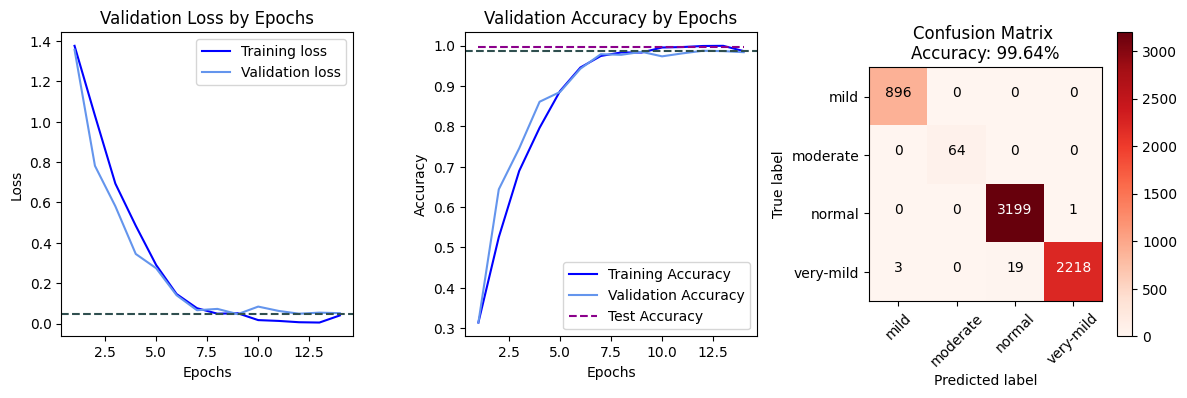

In [ ]:
# Evaluate the model on test data
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics and test results
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg19")


#VGG19 test and trials 2

Model Architecture

In [ ]:
from keras.applications import VGG19
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Create VGG19 model with pre-trained weights
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Set the last few layers of VGG19 as trainable
for layer in vgg.layers[-4:]:
    layer.trainable = True

# Flatten the output of VGG19
x = Flatten()(vgg.output)

# Add a dense layer with L2 regularization
prediction = Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)

# Create the modified model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Compile the model
opt = Adam(learning_rate=0.0001) #beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='.alzheimer_vgg19_model.hdf5', monitor='val_loss', save_best_only=True, mode='auto')



Model Training

In [ ]:
# Start training
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=15,
                    callbacks=[callback, checkpointer])
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60, 2)))



Epoch 1/15
77/77 [==============================] - 118s 1s/step - loss: 1.3160 - accuracy: 0.3575 - val_loss: 1.0717 - val_accuracy: 0.5421
Epoch 2/15
77/77 [==============================] - 111s 1s/step - loss: 0.8441 - accuracy: 0.6304 - val_loss: 0.6789 - val_accuracy: 0.7007
Epoch 3/15
77/77 [==============================] - 112s 1s/step - loss: 0.5942 - accuracy: 0.7474 - val_loss: 0.5250 - val_accuracy: 0.7646
Epoch 4/15
77/77 [==============================] - 111s 1s/step - loss: 0.4203 - accuracy: 0.8296 - val_loss: 0.3783 - val_accuracy: 0.8431
Epoch 5/15
77/77 [==============================] - 111s 1s/step - loss: 0.2802 - accuracy: 0.8911 - val_loss: 0.2627 - val_accuracy: 0.8996
Epoch 6/15
77/77 [==============================] - 111s 1s/step - loss: 0.1642 - accuracy: 0.9392 - val_loss: 0.1392 - val_accuracy: 0.9529
Epoch 7/15
77/77 [==============================] - 112s 1s/step - loss: 0.1030 - accuracy: 0.9641 - val_loss: 0.1170 - val_accuracy: 0.9626
Epoch 8/15
77

Model Evaluation

100/100 [==============================] - 6s 59ms/step

Model Accuracy: 98.28% on Test Data

              precision    recall  f1-score   support

        mild       1.00      0.99      0.99       896
    moderate       0.97      1.00      0.98        64
      normal       0.98      0.99      0.98      3200
   very-mild       0.99      0.96      0.98      2240

    accuracy                           0.98      6400
   macro avg       0.98      0.99      0.98      6400
weighted avg       0.98      0.98      0.98      6400



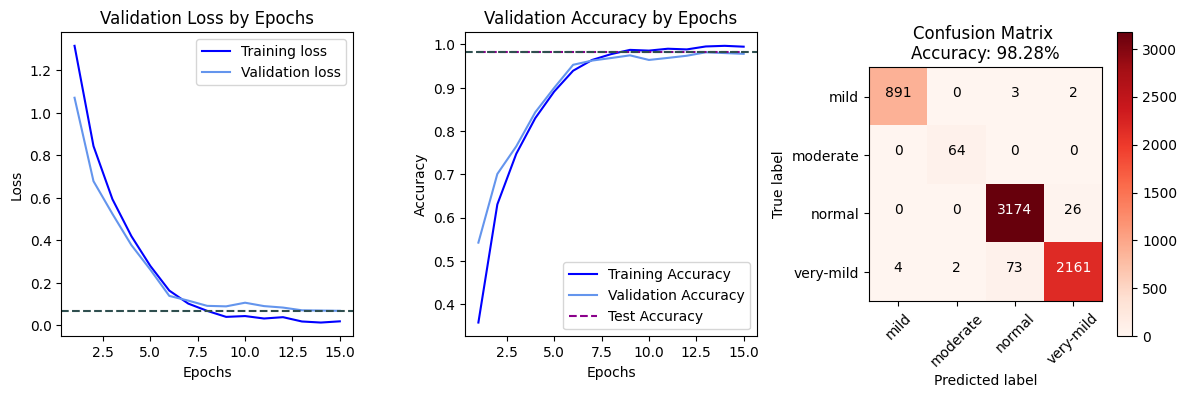

In [ ]:
# Evaluate the model on test data
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics and test results
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg19")


# Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'

In [ ]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

100% 380M/380M [00:22<00:00, 23.3MB/s]
100% 380M/380M [00:22<00:00, 17.7MB/s]


In [ ]:

zip_ref = zipfile.ZipFile('augmented-alzheimer-mri-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:

import os

extracted_files = os.listdir('/tmp')
print(extracted_files)


['drive.3d9ba4a9d804.root.log.WARNING.20230712-130622.721', 'directoryprefetcher_binary.3d9ba4a9d804.root.log.INFO.20230712-130625.814', 'debugger_2lz4cyc34y', 'pyright-422-SOLY7svnfJCp', 'drivefs_ipc.0', 'drive.INFO', 'drivefs_ipc.0_shell', 'drive.3d9ba4a9d804.root.log.INFO.20230712-130622.593', 'drive.3d9ba4a9d804.root.log.INFO.20230712-130611.593', 'AugmentedAlzheimerDataset', 'directoryprefetcher_binary.INFO', 'drive.WARNING', 'initgoogle_syslog_dir.0', 'language_service.INFO', 'drive.ERROR', 'pyright-422-1wNEdL5WZkZJ', 'drive.3d9ba4a9d804.root.log.INFO.20230712-130611.596', 'drive.3d9ba4a9d804.root.log.ERROR.20230712-130622.721', 'OriginalDataset', 'dap_multiplexer.INFO', 'dap_multiplexer.3d9ba4a9d804.root.log.INFO.20230712-130454.122', 'drive.3d9ba4a9d804.root.log.INFO.20230712-130622.721', 'python-languageserver-cancellation', 'language_service.3d9ba4a9d804.root.log.INFO.20230712-130539.413']


In [ ]:
len(os.listdir('/tmp/AugmentedAlzheimerDataset'))



4

In [ ]:
len(os.listdir('/tmp/OriginalDataset'))

4

In [ ]:
import os

file_list = os.listdir()
print(file_list)

['.config', 'kaggle.json', 'augmented-alzheimer-mri-dataset.zip', 'drive', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# System libraries
from pathlib import Path
import os.path
from distutils.dir_util import copy_tree, remove_tree
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
import time

from PIL import Image
from random import randint

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow

from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101 # ResNet 101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3


import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))






Num GPUs Available:  1


In [ ]:
# Set the seed value for experiment reproducibility.
seed_value = 1842
tensorflow.random.set_seed(seed_value)  # Set seed for TensorFlow random operations
np.random.seed(seed_value)  # Set seed for NumPy random operations

# Turn off warnings for a cleaner-looking notebook
warnings.simplefilter('ignore')


Data Pre-processing

In [ ]:
#AUGMENTED DATA

aug_data = os.listdir('/tmp/AugmentedAlzheimerDataset')
org_data = os.listdir('/tmp/OriginalDataset')

In [ ]:
import os
from pathlib import Path
import pandas as pd

# Define the paths for augmented and original datasets
aug_data_path = '/tmp/AugmentedAlzheimerDataset'
org_data_path = '/tmp/OriginalDataset'

# Get filepaths and labels
filepaths = []
labels = []

# Iterate through the directories and files in the augmented dataset path
for root, dirs, files in os.walk(aug_data_path):
    for file in files:
        # Check if the file has a .jpg or .jpeg extension
        if file.lower().endswith(('.jpg', '.jpeg')):
            filepaths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create pandas Series for filepaths and labels
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels into a dataframe
image_df = pd.concat([filepaths, labels], axis=1)




In [ ]:
image_df

Filepath             Label
0      /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
1      /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
2      /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
3      /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
4      /tmp/AugmentedAlzheimerDataset/VeryMildDemente...  VeryMildDemented
...                                                  ...               ...
33979  /tmp/AugmentedAlzheimerDataset/NonDemented/3a8...       NonDemented
33980  /tmp/AugmentedAlzheimerDataset/NonDemented/8bf...       NonDemented
33981  /tmp/AugmentedAlzheimerDataset/NonDemented/91e...       NonDemented
33982  /tmp/AugmentedAlzheimerDataset/NonDemented/9db...       NonDemented
33983  /tmp/AugmentedAlzheimerDataset/NonDemented/5fd...       NonDemented

[33984 rows x 2 columns]

In [ ]:
def get_dataset(augmented=0):
    if augmented == 0:
        image_dir = Path(org_data_path)
    else:
        image_dir = Path(aug_data_path)

    # Get filepaths and labels
    filepaths = []
    labels = []

    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg')):
                filepaths.append(os.path.join(root, file))
                labels.append(os.path.basename(root))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df


In [ ]:
train_df = get_dataset(1)
test_df = get_dataset(0)

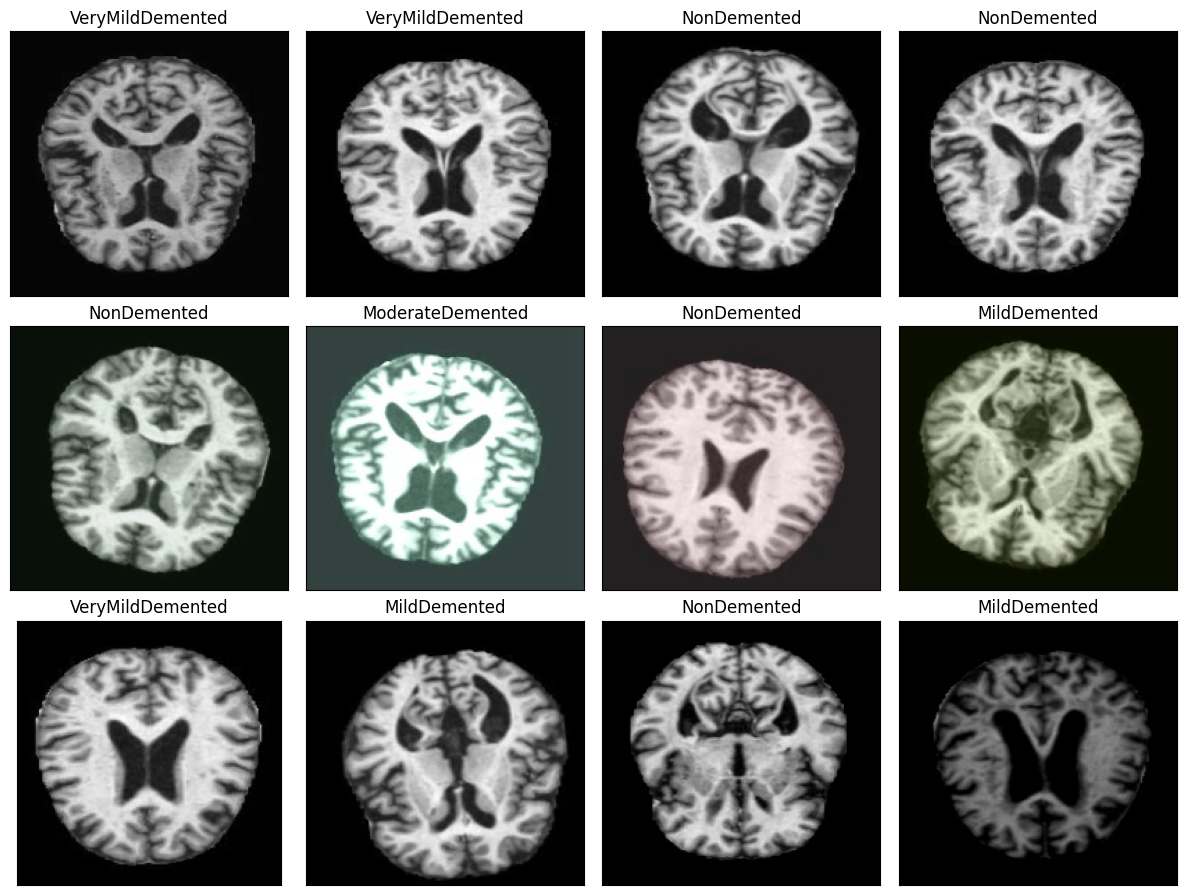

In [ ]:
random_index = np.random.randint(0, len(train_df), size=(3, 4))

# Create a figure with 3 rows and 4 columns for image display
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9),
                         subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the axes and display the images with labels
for i, ax in enumerate(axes.flat):
    # Calculate the row and column indices
    row = i // 4
    col = i % 4

    # Check if the calculated indices are within the bounds of the random_index array
    if row < random_index.shape[0] and col < random_index.shape[1]:
        # Read the image using OpenCV and convert the color space to RGB
        img = cv2.cvtColor(plt.imread(train_df.Filepath[random_index[row, col]]), cv2.COLOR_BGR2RGB)

        # Display the image
        ax.imshow(img)

        # Set the title as the corresponding label
        ax.set_title(train_df.Label[random_index[row, col]])

# Adjust the layout and save the figure as a PDF
plt.tight_layout()
plt.savefig("Augmented.pdf")

# Show the figure with the images and labels
plt.show()


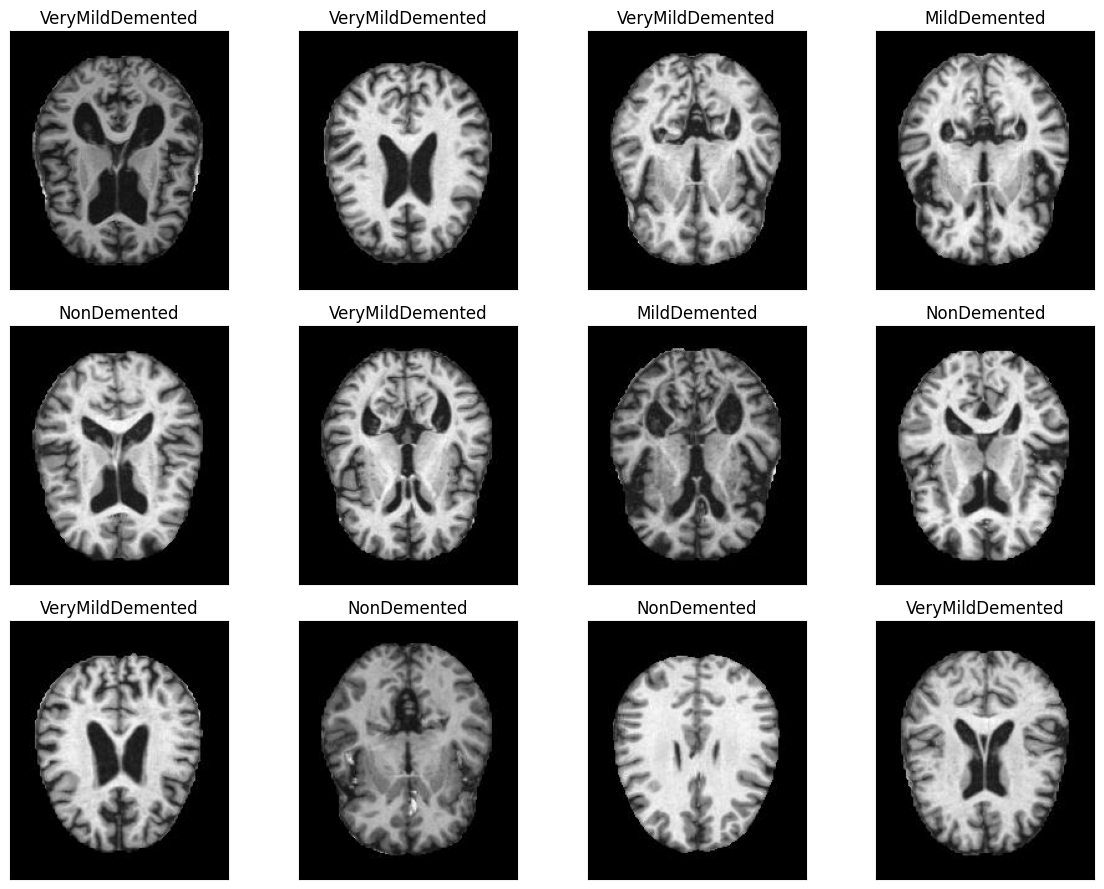

In [ ]:
random_index = np.random.randint(0, len(test_df), size=(3, 4))

# Create a figure with 3 rows and 4 columns for image display
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9),
                         subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the axes and display the images with labels
for i, ax in enumerate(axes.flat):
    # Calculate the row and column indices
    row = i // 4
    col = i % 4

    # Check if the calculated indices are within the bounds of the random_index array
    if row < random_index.shape[0] and col < random_index.shape[1]:
        # Read the image using OpenCV and convert the color space to RGB
        img = cv2.cvtColor(plt.imread(test_df.Filepath[random_index[row, col]]), cv2.COLOR_BGR2RGB)

        # Display the image
        ax.imshow(img)

        # Set the title as the corresponding label
        ax.set_title(test_df.Label[random_index[row, col]])

# Adjust the layout and save the figure as a PDF
plt.tight_layout()
plt.savefig("Original.pdf")

# Show the figure with the images and labels
plt.show()


In [ ]:
print("Train data set label distribution:\n",train_df.Label.value_counts())

print("\nTest data set label distribution:\n", test_df.Label.value_counts())

Train data set label distribution:
 NonDemented         9600
VeryMildDemented    8960
MildDemented        8960
ModerateDemented    6464
Name: Label, dtype: int64

Test data set label distribution:
 NonDemented         3200
VeryMildDemented    2240
MildDemented         896
ModerateDemented      64
Name: Label, dtype: int64


In [ ]:
import shutil
import os

# Set the base directory path
base_dir = "/tmp/"

# Define the directory paths for the train and test datasets

train_dir = os.path.join(base_dir, "AugmentedAlzheimerDataset/")
test_dir = os.path.join(base_dir, "OriginalDataset/")



In [ ]:
# Define the class labels
class_labels = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Define the desired image size and dimension

IMG_SIZE = 224
IMAGE_SIZE = [224, 224]
DIM = (IMG_SIZE, IMG_SIZE)


In [ ]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Generate training data from the augmented Alzheimer's dataset
train_gen = datagen.flow_from_directory(directory=train_dir,
                                             target_size=DIM,
                                             batch_size=400,
                                             class_mode='categorical',
                                             subset='training',
                                             shuffle=True)

# Generate validation data from the augmented Alzheimer's dataset
validation_gen = datagen.flow_from_directory(directory=train_dir,
                                             target_size=DIM,
                                             batch_size=400,
                                             class_mode='categorical',
                                             subset='validation',
                                             shuffle=True)

# Generate test data from the original dataset
test_gen = datagen.flow_from_directory(directory=test_dir,
                                             target_size=DIM,
                                             batch_size=6400,
                                             class_mode='categorical')


Found 30586 images belonging to 4 classes.
Found 3398 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [ ]:
# Generate test data for plotting from the original dataset
test_gen_plot = datagen.flow_from_directory(directory=test_dir,
                                             target_size=DIM,
                                             batch_size=128,
                                             class_mode='categorical')


Found 6400 images belonging to 4 classes.


In [ ]:
import itertools

def visualize_training_metrics(training_history, model, test_generator, y_actual, y_pred, classes, model_name):
    """
    Input: trained model history, model, test image generator, actual and predicted labels, class list
    Output: Plots loss vs epochs, accuracy vs epochs, confusion matrix
    """

    # Evaluate the results:
    test_metrics = model.evaluate(test_generator, verbose=False)
    test_loss = test_metrics[0]
    test_acc = test_metrics[1] * 100
    results_title = f"\nModel Accuracy: {test_acc:.2f}% on Test Data\n"
    print(results_title)

    # Print classification report
    print(classification_report(y_actual, y_pred, target_names=classes))

    # Extract data from training history for plotting
    history_dict = training_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    # Get the min loss and max accuracy for plotting
    min_loss = np.min(val_loss_values)
    max_acc = np.max(val_acc_values)

    # Create plots
    plt.subplots(figsize=(12, 4))

    # Plot loss by epochs
    plt.subplot(1, 3, 1)
    plt.plot(epochs, loss_values, 'b-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'cornflowerblue', label='Validation loss')
    plt.title('Validation Loss by Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.axhline(y=min_loss, color='darkslategray', linestyle='--')
    plt.legend()

    # Plot accuracy by epochs
    plt.subplot(1, 3, 2)
    plt.plot(epochs, acc_values, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'cornflowerblue', label='Validation Accuracy')
    plt.plot(epochs, [test_acc / 100] * len(epochs), 'darkmagenta', linestyle='--', label='Test Accuracy')
    plt.title('Validation Accuracy by Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.axhline(y=max_acc, color='darkslategray', linestyle='--')
    plt.legend()

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_actual, y_pred)

    # Create confusion matrix plot
    plt.subplot(1, 3, 3)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)  # Change the cmap to Reds
    plt.title(f"Confusion Matrix \nAccuracy: {test_acc:.2f}%")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop through matrix, plot each value
    threshold = cm.max() / 2.
    for r, c in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(c, r, format(cm[r, c], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[r, c] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(f"{model_name}.pdf")

    plt.show()


In [ ]:
# Prepare true and predicted labels for evaluation on the test data.

def prepare_for_test(model, test_gen):
    data, y_true = test_gen.next()
    y_pred_ = model.predict(data, batch_size = 64)
    y_pred = []
    for i in range(y_pred_.shape[0]):
        y_pred.append(np.argmax(y_pred_[i]))

    y_true = np.argmax(y_true, axis=1)

    return y_true, y_pred


# with size 224

#VGG19 test and trials 2 with Image Size 224 BEST MODEL!!!! *******
PROPOSED MODEL

Model Architecture

In [ ]:
from keras.applications import VGG19
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Create VGG19 model with pre-trained weights
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Set the last few layers of VGG19 as trainable
for layer in vgg.layers[-4:]:
    layer.trainable = True

# Flatten the output of VGG19
x = Flatten()(vgg.output)

# Add a dense layer with L2 regularization
prediction = Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)

# Create the modified model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Compile the model
opt = Adam(learning_rate=0.0001) #beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='.alzheimer_vgg19_model.hdf5', monitor='val_loss', save_best_only=True, mode='auto')



Model Training

In [ ]:
# Start training
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=15,
                    callbacks=[callback, checkpointer])
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60, 2)))



Epoch 1/15
77/77 [==============================] - 78s 936ms/step - loss: 1.3953 - accuracy: 0.2751 - val_loss: 1.3742 - val_accuracy: 0.2840
Epoch 2/15
77/77 [==============================] - 72s 922ms/step - loss: 1.2646 - accuracy: 0.3967 - val_loss: 1.0116 - val_accuracy: 0.5656
Epoch 3/15
77/77 [==============================] - 72s 922ms/step - loss: 0.8004 - accuracy: 0.6520 - val_loss: 0.6813 - val_accuracy: 0.7098
Epoch 4/15
77/77 [==============================] - 72s 923ms/step - loss: 0.5943 - accuracy: 0.7456 - val_loss: 0.5221 - val_accuracy: 0.7781
Epoch 5/15
77/77 [==============================] - 72s 924ms/step - loss: 0.4080 - accuracy: 0.8328 - val_loss: 0.3456 - val_accuracy: 0.8646
Epoch 6/15
77/77 [==============================] - 72s 924ms/step - loss: 0.2644 - accuracy: 0.9001 - val_loss: 0.2354 - val_accuracy: 0.9073
Epoch 7/15
77/77 [==============================] - 72s 923ms/step - loss: 0.1390 - accuracy: 0.9482 - val_loss: 0.1214 - val_accuracy: 0.9553

Model Evaluation

100/100 [==============================] - 5s 46ms/step

Model Accuracy: 99.08% on Test Data

              precision    recall  f1-score   support

        mild       0.99      0.99      0.99       896
    moderate       1.00      1.00      1.00        64
      normal       0.99      0.99      0.99      3200
   very-mild       0.99      0.98      0.99      2240

    accuracy                           0.99      6400
   macro avg       0.99      0.99      0.99      6400
weighted avg       0.99      0.99      0.99      6400



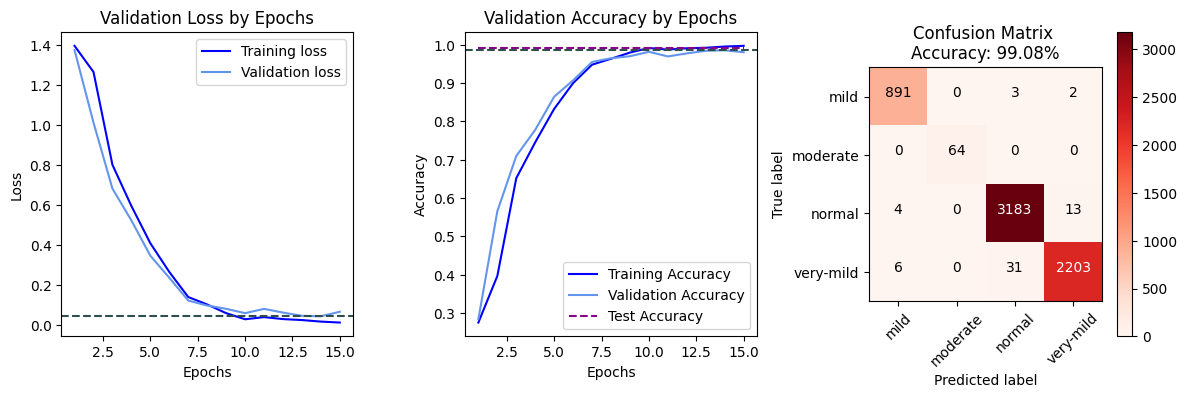

In [ ]:
# Evaluate the model on test data
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics and test results
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg19")


Proposed Model Visualisation

In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()

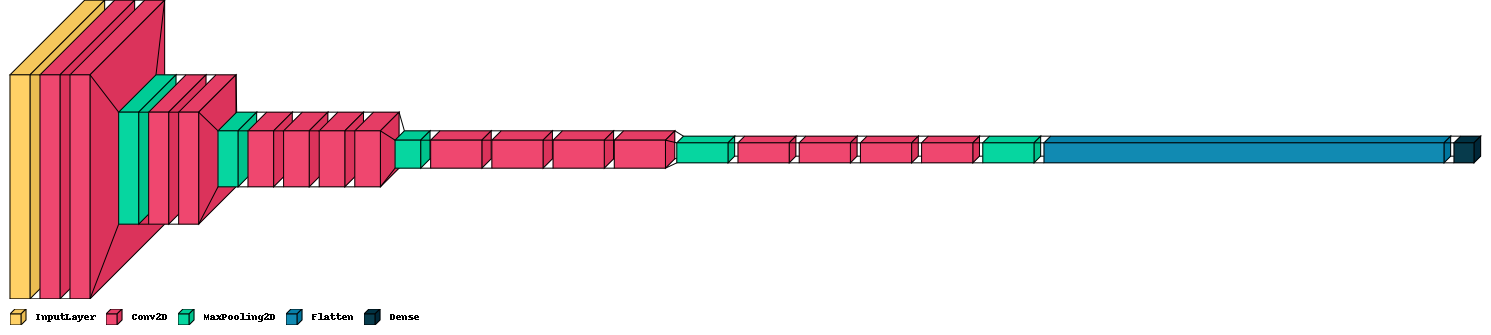

In [ ]:
# visualize the model
import visualkeras
visualkeras.layered_view(model, scale_xy = 1, legend = True, font = font)

#VGG19 test and trials 224

Model Architecture

In [ ]:
from keras.applications import VGG19
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Create VGG19 model with pre-trained weights
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Set the last few layers of VGG19 as trainable
for layer in vgg.layers[-4:]:
    layer.trainable = True

# Flatten the output of VGG19
x = Flatten()(vgg.output)

# Add a dense layer with L2 regularization
prediction = Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(x)

# Create the modified model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()



Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Model compilation


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Compile the model
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='.alzheimer_vgg19_model.hdf5', monitor='val_loss', save_best_only=True, mode='auto')



MOdel Training

In [ ]:
# Start training
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=15,
                    callbacks=[callback, checkpointer])
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60, 2)))



Epoch 1/15
77/77 [==============================] - 78s 933ms/step - loss: 1.4801 - accuracy: 0.2857 - val_loss: 1.3458 - val_accuracy: 0.3870
Epoch 2/15
77/77 [==============================] - 71s 916ms/step - loss: 1.3191 - accuracy: 0.3651 - val_loss: 1.1676 - val_accuracy: 0.4285
Epoch 3/15
77/77 [==============================] - 71s 917ms/step - loss: 1.0242 - accuracy: 0.5316 - val_loss: 0.8988 - val_accuracy: 0.5886
Epoch 4/15
77/77 [==============================] - 71s 918ms/step - loss: 0.8019 - accuracy: 0.6288 - val_loss: 0.7529 - val_accuracy: 0.6533
Epoch 5/15
77/77 [==============================] - 72s 921ms/step - loss: 0.7230 - accuracy: 0.6677 - val_loss: 0.6664 - val_accuracy: 0.6998
Epoch 6/15
77/77 [==============================] - 71s 917ms/step - loss: 0.6289 - accuracy: 0.7196 - val_loss: 0.6462 - val_accuracy: 0.7134
Epoch 7/15
77/77 [==============================] - 71s 919ms/step - loss: 0.5660 - accuracy: 0.7511 - val_loss: 0.5199 - val_accuracy: 0.7902

Model Evaluation

100/100 [==============================] - 5s 46ms/step

Model Accuracy: 93.83% on Test Data

              precision    recall  f1-score   support

        mild       0.94      0.93      0.93       896
    moderate       0.83      1.00      0.91        64
      normal       0.96      0.94      0.95      3200
   very-mild       0.92      0.94      0.93      2240

    accuracy                           0.94      6400
   macro avg       0.91      0.95      0.93      6400
weighted avg       0.94      0.94      0.94      6400



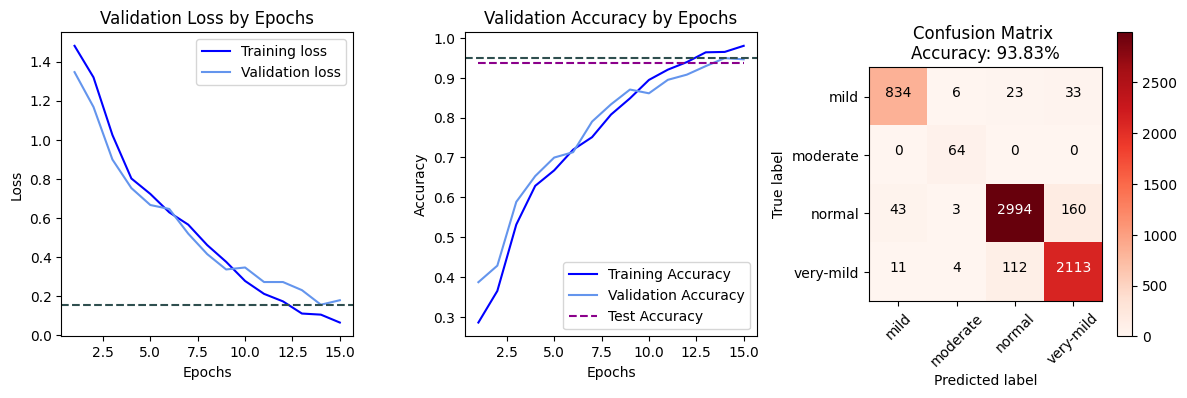

In [ ]:
# Evaluate the model on test data
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics and test results
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg19")


# trials with inception v3

Model Architecture

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import GlobalAveragePooling2D


# Load the InceptionV3 model without the top layers
base_model = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the base model layers
base_model.trainable = True

# Add your own classification layers with L2 regularization
x = base_model.output
x = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu',
           kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(x)
prediction = Dense(4, activation='softmax')(x)

# Create the modified model
model = Model(inputs=base_model.input, outputs=prediction)
model.summary()



Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_667 (Conv2D)            (None, 111, 111, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_658 (Batch  (None, 111, 111, 32  96         ['conv2d_667[0][0]']             
 Normalization)                 )                                                          

Model Compilation

In [ ]:
# Compile the model with L2 regularization and specify the optimizer, loss, and metrics
opt = Adam(learning_rate=0.001) #, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss',
                         patience=3,
                         restore_best_weights=True)

checkpointer = ModelCheckpoint(filepath='.alzheimer_inceptionv3_model.hdf5',
                               monitor='val_loss',
                               save_best_only=True,
                               mode='auto')



Model Training

In [ ]:
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=30,
                    callbacks=[callback, checkpointer])
# time
toc = time.perf_counter()
print("Total Time: {}".format(round((toc-tic)/60, 2)))



Epoch 1/30
77/77 [==============================] - 101s 872ms/step - loss: 1.2103 - accuracy: 0.6747 - val_loss: 3.2889 - val_accuracy: 0.3473
Epoch 2/30
77/77 [==============================] - 66s 856ms/step - loss: 0.4405 - accuracy: 0.9448 - val_loss: 1.5323 - val_accuracy: 0.7287
Epoch 3/30
77/77 [==============================] - 64s 831ms/step - loss: 0.2629 - accuracy: 0.9836 - val_loss: 3.0724 - val_accuracy: 0.5853
Epoch 4/30
77/77 [==============================] - 66s 851ms/step - loss: 0.2004 - accuracy: 0.9867 - val_loss: 0.9168 - val_accuracy: 0.8275
Epoch 5/30
77/77 [==============================] - 66s 852ms/step - loss: 0.1508 - accuracy: 0.9910 - val_loss: 0.2480 - val_accuracy: 0.9517
Epoch 6/30
77/77 [==============================] - 65s 834ms/step - loss: 0.1212 - accuracy: 0.9919 - val_loss: 1.3055 - val_accuracy: 0.7175
Epoch 7/30
77/77 [==============================] - 65s 846ms/step - loss: 0.0988 - accuracy: 0.9936 - val_loss: 0.8726 - val_accuracy: 0.852

Model Evaluation

100/100 [==============================] - 4s 26ms/step

Model Accuracy: 94.30% on Test Data

              precision    recall  f1-score   support

        mild       0.99      0.93      0.96       896
    moderate       0.95      0.97      0.96        64
      normal       1.00      0.91      0.95      3200
   very-mild       0.87      1.00      0.93      2240

    accuracy                           0.94      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.94      0.94      6400



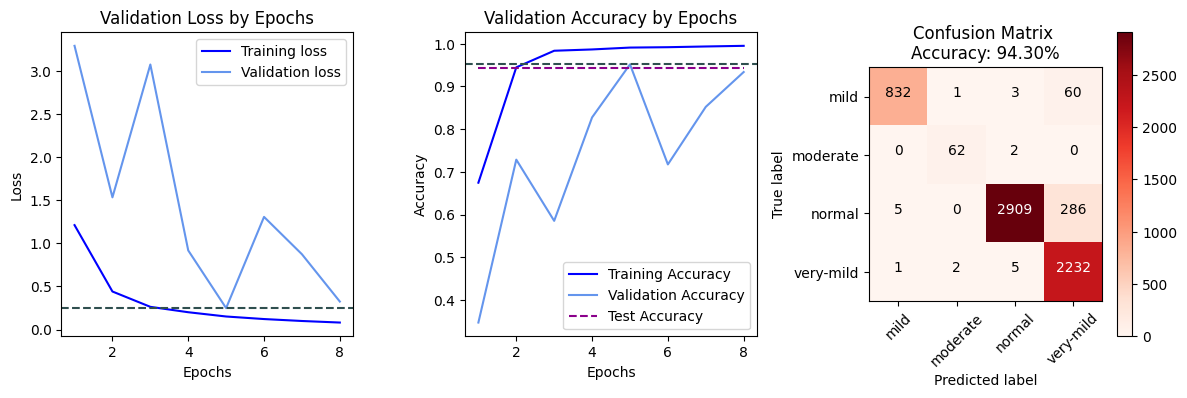

In [ ]:


y_true, y_pred = prepare_for_test(model, test_gen)
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="inceptionv3")


#VGG19 test and trials 3 - Overfitting Model

In [ ]:
from keras.applications import VGG19
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Create VGG19 model with pre-trained weights
vgg = VGG19(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Set the last few layers of VGG19 as trainable
for layer in vgg.layers[-4:]:
    layer.trainable = True

# Flatten the output of VGG19
x = Flatten()(vgg.output)

# Add a dense layer with L2 regularization
prediction = Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)

# Create the modified model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Compile the model
opt = Adam(learning_rate=0.0001) #beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='.alzheimer_vgg19_model.hdf5', monitor='val_loss', save_best_only=True, mode='auto')



In [ ]:
# Start training
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=15,
                    callbacks=[callback, checkpointer])
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60, 2)))



Epoch 1/15
77/77 [==============================] - 136s 1s/step - loss: 1.2592 - accuracy: 0.3922 - val_loss: 0.8224 - val_accuracy: 0.6280
Epoch 2/15
77/77 [==============================] - 72s 936ms/step - loss: 0.6689 - accuracy: 0.7043 - val_loss: 0.4931 - val_accuracy: 0.7875
Epoch 3/15
77/77 [==============================] - 72s 931ms/step - loss: 0.3953 - accuracy: 0.8368 - val_loss: 0.2469 - val_accuracy: 0.9117
Epoch 4/15
77/77 [==============================] - 72s 929ms/step - loss: 0.1651 - accuracy: 0.9387 - val_loss: 0.1245 - val_accuracy: 0.9529
Epoch 5/15
77/77 [==============================] - 72s 929ms/step - loss: 0.0849 - accuracy: 0.9707 - val_loss: 0.0637 - val_accuracy: 0.9770
Epoch 6/15
77/77 [==============================] - 72s 931ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0493 - val_accuracy: 0.9841
Epoch 7/15
77/77 [==============================] - 72s 932ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0464 - val_accuracy: 0.9847
E

100/100 [==============================] - 6s 46ms/step

Model Accuracy: 99.69% on Test Data

              precision    recall  f1-score   support

        mild       1.00      1.00      1.00       896
    moderate       1.00      1.00      1.00        64
      normal       1.00      1.00      1.00      3200
   very-mild       1.00      0.99      1.00      2240

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



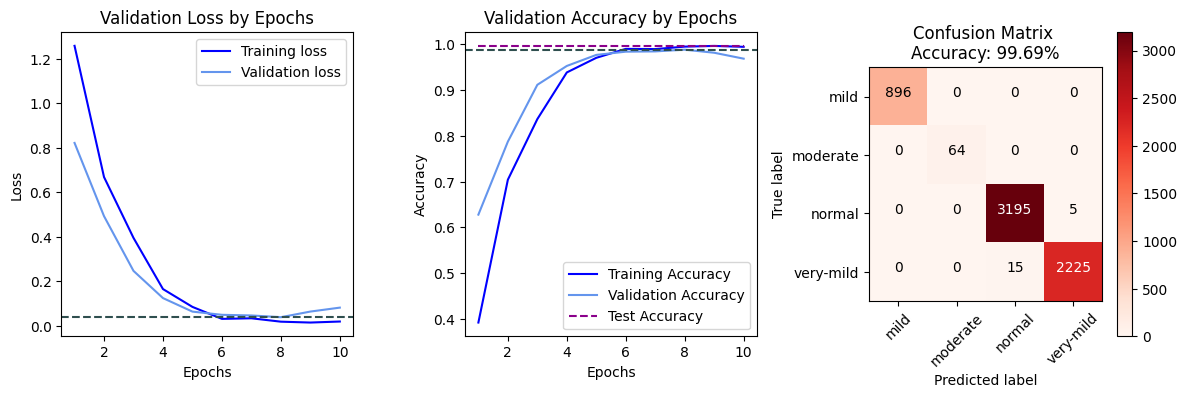

In [ ]:
# Evaluate the model on test data
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics and test results
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg19")


In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 47.5 MB/s eta 0:00:00


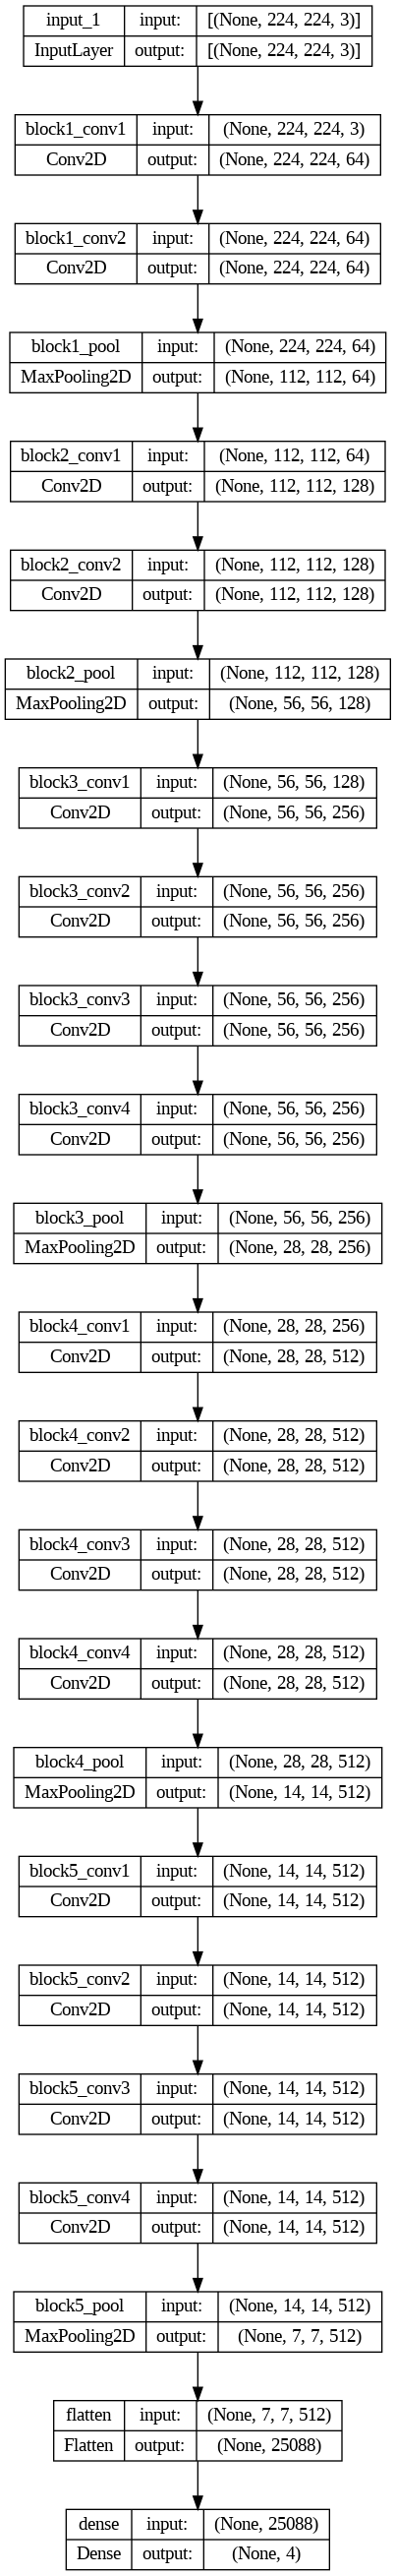

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True)


#MODIFIED VGG16 test and trials 2 with 224 *
Model Architecture

In [ ]:
from keras.applications import VGG19
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Create VGG16 model with pre-trained weights
vgg = VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)

# Set the last few layers of VGG16 as trainable
for layer in vgg.layers[-4:]:
    layer.trainable = True

# Flatten the output of VGG16
x = Flatten()(vgg.output)

# Add a dense layer with L2 regularization
prediction = Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(x)

# Create the modified model
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Model Compilation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Compile the model
opt = Adam(learning_rate=0.0001) # beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callback = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='.alzheimer_vgg19_model.hdf5', monitor='val_loss', save_best_only=True, mode='auto')



Model Training

In [ ]:
# Start training
tic = time.perf_counter()
history = model.fit(train_gen,
                    steps_per_epoch=len(train_gen),
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen),
                    epochs=10,
                    callbacks=[callback, checkpointer])
toc = time.perf_counter()
print("Total Time:{}".format(round((toc-tic)/60, 2)))



Epoch 1/10
77/77 [==============================] - 70s 857ms/step - loss: 1.1502 - accuracy: 0.4929 - val_loss: 0.7449 - val_accuracy: 0.6716
Epoch 2/10
77/77 [==============================] - 66s 843ms/step - loss: 0.5988 - accuracy: 0.7577 - val_loss: 0.4484 - val_accuracy: 0.8178
Epoch 3/10
77/77 [==============================] - 65s 839ms/step - loss: 0.3661 - accuracy: 0.8631 - val_loss: 0.2622 - val_accuracy: 0.9055
Epoch 4/10
77/77 [==============================] - 65s 841ms/step - loss: 0.1839 - accuracy: 0.9422 - val_loss: 0.1517 - val_accuracy: 0.9550
Epoch 5/10
77/77 [==============================] - 65s 838ms/step - loss: 0.0905 - accuracy: 0.9780 - val_loss: 0.0827 - val_accuracy: 0.9773
Epoch 6/10
77/77 [==============================] - 65s 832ms/step - loss: 0.0507 - accuracy: 0.9914 - val_loss: 0.1101 - val_accuracy: 0.9650
Total Time:6.63


100/100 [==============================] - 4s 40ms/step

Model Accuracy: 98.98% on Test Data

              precision    recall  f1-score   support

        mild       1.00      0.98      0.99       896
    moderate       1.00      1.00      1.00        64
      normal       0.99      0.99      0.99      3200
   very-mild       0.98      0.99      0.99      2240

    accuracy                           0.99      6400
   macro avg       0.99      0.99      0.99      6400
weighted avg       0.99      0.99      0.99      6400



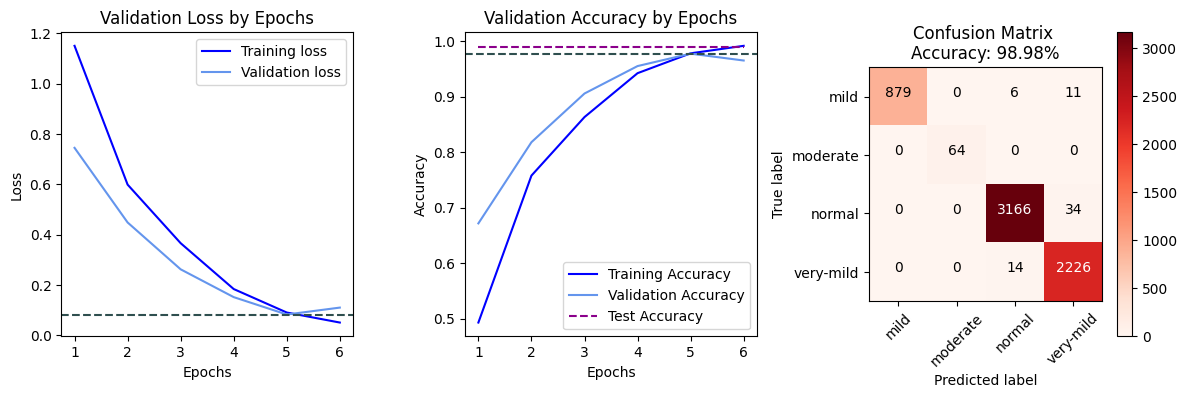

In [ ]:
# Evaluate the model on test data
y_true, y_pred = prepare_for_test(model, test_gen)

# Visualize training metrics and test results
visualize_training_metrics(history, model, test_gen_plot, y_true, y_pred, ['mild', 'moderate', 'normal', 'very-mild'], model_name="vgg16")


The End